<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Final Project</h1></center>

<b>Group_ID: <code> 4 </code><b>

<b>Group Members:</b>  

1. <code>Riasat_B00974221</code>
2. <code>Mahsa_B00954491</code>
3. <code>Dorsa_B00965859</code>
4. <code>Lovelyn_B00926199</code>


# 1. Dataset Information 

<h4> Dataset Name: <code> cost_of_living_us.csv</code></h4>
<h4> Link to the Dataset: <code>https://www.kaggle.com/datasets/asaniczka/us-cost-of-living-dataset-3171-counties</code> </h4>
<h4> Dataset Description: The US Family Budget Dataset provides insights into the cost of living in different US counties based on the Family Budget Calculator by the Economic Policy Institute (EPI). This dataset offers community-specific estimates for ten family types, including one or two adults with zero to four children, in all 1877 counties and metro areas across the United States. This dataset contains 31431 Datapoints.</h4>
<code> Provide short description of the dataset here </code>

<h4> Dataset Name: <code> pop.csv</code></h4>
<h4> Link to the Dataset: <code>https://www.census.gov/data/tables/time-series/demo/popest/2020s-counties-detail.html</code> </h4>
<h4> Dataset Description: This dataset features data containing county population estimates by demographic characteristics for years 2020 to 2022 For the United States. This dataset is is collected by the Census Beauru of the United States and containes data for all counties in all States and Territories of the United states. This dataset contains 12577 datapoints </h4>
<code> Provide short description of the dataset here </code>

<h4> Dataset Name: <code> weather.csv</code></h4>
<h4> Link to the Dataset: <code>https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/county/mapping/110/tavg/202212/60/value</code> </h4>
<h4> Dataset Description: This dataset features data containing county average temperate and weather from January 2018 to December 2022 For the United States. The Dataset is collected by the National Center for Environmental Information. This dataset contains 3108 datapoints for each county in the contigious United States. </h4>
<code> Provide short description of the dataset here </code>


# 2. Task Information 

<h4> Task Goal: <code> Predict the best places to move into given user preferences </code></h4>
<h4> Task Description: </h4>
    <code>This research introduces a specialized system designed to help both new immigrants and existing citizens of the United States be suggest the best states to move into. This is done by taking several user preferences regarding factors such as  income, cost of living, preferred weather, and preferred demographics etc. This approach ensures multiple facets are considered in regards to choosing the best states for each individual user.</code>

# 3. Task Implementation: Coding

### 3.1 Preprocessing 

#### 3.1.1 Original Dataset

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset
import torch

In [2]:
df = pd.read_csv('cost_of_living_us.csv')
df

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,3171,WY,False,"Weston County, WY",Weston County,2p0c,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.656250
31426,3171,WY,False,"Weston County, WY",Weston County,2p1c,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.656250
31427,3171,WY,False,"Weston County, WY",Weston County,2p2c,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.656250
31428,3171,WY,False,"Weston County, WY",Weston County,2p3c,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.656250


In [3]:
df['adult_count'] = df['family_member_count'].str[0]
df['child_count'] = df['family_member_count'].str[2]
df = df.drop(['family_member_count'], axis=1)
df

,case_id,state,isMetro,areaname,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count
0,1,AL,True,"Montgomery, AL MSA",Autauga County,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,0
1,1,AL,True,"Montgomery, AL MSA",Autauga County,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,1
2,1,AL,True,"Montgomery, AL MSA",Autauga County,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,2
3,1,AL,True,"Montgomery, AL MSA",Autauga County,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1,3
4,1,AL,True,"Montgomery, AL MSA",Autauga County,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,3171,WY,False,"Weston County, WY",Weston County,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.656250,2,0
31426,3171,WY,False,"Weston County, WY",Weston County,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.656250,2,1
31427,3171,WY,False,"Weston County, WY",Weston County,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.656250,2,2
31428,3171,WY,False,"Weston County, WY",Weston County,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.656250,2,3


Separate the number of Adults and Children from overall family member counts into seperate values. This is doen in order to both extract additional data and to account for more non traditional family structures.

#### 3.1.2 Weather Dataset

In [4]:
us_states = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [5]:
df_weather = pd.read_csv('weather.csv')
df_weather

,ID,Name,State,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,AL-001,Autauga County,Alabama,65.8,121.0,1.9,63.9
1,AL-003,Baldwin County,Alabama,68.4,121.0,1.6,66.8
2,AL-005,Barbour County,Alabama,65.9,120.0,1.1,64.8
3,AL-007,Bibb County,Alabama,64,120.0,1.2,62.7
4,AL-009,Blount County,Alabama,62.6,121.0,2.0,60.6
...,...,...,...,...,...,...,...
3102,WY-037,Sweetwater County,Wyoming,42.3,109.0,1.5,40.7
3103,WY-039,Teton County,Wyoming,35.5,113.0,1.2,34.4
3104,WY-041,Uinta County,Wyoming,40.3,108.0,1.2,39.1
3105,WY-043,Washakie County,Wyoming,44.4,91.0,1.0,43.4


In [6]:
df_weather['State'] =  df_weather['State'].apply(lambda x: us_states.get(x, x))
df_weather

,ID,Name,State,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,AL-001,Autauga County,AL,65.8,121.0,1.9,63.9
1,AL-003,Baldwin County,AL,68.4,121.0,1.6,66.8
2,AL-005,Barbour County,AL,65.9,120.0,1.1,64.8
3,AL-007,Bibb County,AL,64,120.0,1.2,62.7
4,AL-009,Blount County,AL,62.6,121.0,2.0,60.6
...,...,...,...,...,...,...,...
3102,WY-037,Sweetwater County,WY,42.3,109.0,1.5,40.7
3103,WY-039,Teton County,WY,35.5,113.0,1.2,34.4
3104,WY-041,Uinta County,WY,40.3,108.0,1.2,39.1
3105,WY-043,Washakie County,WY,44.4,91.0,1.0,43.4


In [7]:
df_weather = df_weather.rename(columns={'Name':'county', 'State':'state'})
df_weather

,ID,county,state,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,AL-001,Autauga County,AL,65.8,121.0,1.9,63.9
1,AL-003,Baldwin County,AL,68.4,121.0,1.6,66.8
2,AL-005,Barbour County,AL,65.9,120.0,1.1,64.8
3,AL-007,Bibb County,AL,64,120.0,1.2,62.7
4,AL-009,Blount County,AL,62.6,121.0,2.0,60.6
...,...,...,...,...,...,...,...
3102,WY-037,Sweetwater County,WY,42.3,109.0,1.5,40.7
3103,WY-039,Teton County,WY,35.5,113.0,1.2,34.4
3104,WY-041,Uinta County,WY,40.3,108.0,1.2,39.1
3105,WY-043,Washakie County,WY,44.4,91.0,1.0,43.4


In [8]:
df= pd.merge(df, df_weather, on=['county', 'state'])
df

,case_id,state,isMetro,areaname,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,...,taxes,total_cost,median_family_income,adult_count,child_count,ID,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,1,AL,True,"Montgomery, AL MSA",Autauga County,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,...,6392.94504,39254.0532,73010.414062,1,0,AL-001,65.8,121.0,1.9,63.9
1,1,AL,True,"Montgomery, AL MSA",Autauga County,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,...,7422.07836,57194.3256,73010.414062,1,1,AL-001,65.8,121.0,1.9,63.9
2,1,AL,True,"Montgomery, AL MSA",Autauga County,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,...,9769.56228,76141.0308,73010.414062,1,2,AL-001,65.8,121.0,1.9,63.9
3,1,AL,True,"Montgomery, AL MSA",Autauga County,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,...,13101.70320,94203.5328,73010.414062,1,3,AL-001,65.8,121.0,1.9,63.9
4,1,AL,True,"Montgomery, AL MSA",Autauga County,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,...,13469.21880,100823.5200,73010.414062,1,4,AL-001,65.8,121.0,1.9,63.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30655,3171,WY,False,"Weston County, WY",Weston County,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,...,6640.77324,55415.4672,80177.656250,2,0,WY-045,44.6,92.0,1.0,43.6
30656,3171,WY,False,"Weston County, WY",Weston County,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,...,7933.21068,75424.1832,80177.656250,2,1,WY-045,44.6,92.0,1.0,43.6
30657,3171,WY,False,"Weston County, WY",Weston County,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,...,9502.56228,96413.1684,80177.656250,2,2,WY-045,44.6,92.0,1.0,43.6
30658,3171,WY,False,"Weston County, WY",Weston County,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,...,11456.36724,113294.2260,80177.656250,2,3,WY-045,44.6,92.0,1.0,43.6


In [9]:
df = df.drop(['ID', 'Rank', 'Anomaly (1901-2000 base period)', '1901-2000 Mean', 'areaname', 'case_id'], axis=1)
df = df.rename(columns={'Value': 'avg temp'})
df

,state,isMetro,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,avg temp
0,AL,True,Autauga County,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,0,65.8
1,AL,True,Autauga County,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,1,65.8
2,AL,True,Autauga County,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,2,65.8
3,AL,True,Autauga County,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1,3,65.8
4,AL,True,Autauga County,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1,4,65.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30655,WY,False,Weston County,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.656250,2,0,44.6
30656,WY,False,Weston County,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.656250,2,1,44.6
30657,WY,False,Weston County,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.656250,2,2,44.6
30658,WY,False,Weston County,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.656250,2,3,44.6


Combine the original dataframe with data from weather dataframe. Then remove the Columns 'ID', 'Rank', 'Anomaly (1901-2000 base period)', '1901-2000 Mean', 'areaname', 'case_id', as we only require Average Temperature for our specified years which is provided by the 'Value' Column.

#### 3.1.3 Population Dataset

In [10]:
df_pop = pd.read_csv('pop.csv')
df_pop

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
0,50,1,1,Alabama,Autauga County,1,58802,28761,30041,3443,...,1055,1165,501,664,955,345,610,39.2,37.9,40.3
1,50,1,1,Alabama,Autauga County,2,58902,28819,30083,3457,...,1064,1170,501,669,958,350,608,39.1,37.9,40.3
2,50,1,1,Alabama,Autauga County,3,59210,28851,30359,3416,...,1074,1190,492,698,972,362,610,39.2,38.0,40.3
3,50,1,1,Alabama,Autauga County,4,59759,29105,30654,3460,...,1152,1225,495,730,1019,385,634,39.2,38.0,40.4
4,50,1,3,Alabama,Baldwin County,1,231761,113388,118373,12046,...,4861,5601,2542,3059,4610,1812,2798,43.7,42.5,44.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12571,50,56,43,Wyoming,Washakie County,4,7719,3973,3746,378,...,187,250,125,125,212,73,139,44.8,43.3,46.6
12572,50,56,45,Wyoming,Weston County,1,6840,3724,3116,308,...,109,175,70,105,191,73,118,43.5,42.7,44.8
12573,50,56,45,Wyoming,Weston County,2,6818,3724,3094,310,...,110,171,70,101,193,73,120,43.5,42.6,44.8
12574,50,56,45,Wyoming,Weston County,3,6766,3729,3037,302,...,115,151,66,85,184,69,115,43.9,43.1,45.3


In [11]:
df_pop = df_pop[df_pop['YEAR'] == 4]
df_pop

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
3,50,1,1,Alabama,Autauga County,4,59759,29105,30654,3460,...,1152,1225,495,730,1019,385,634,39.2,38.0,40.4
7,50,1,3,Alabama,Baldwin County,4,246435,120164,126271,12470,...,5709,6113,2811,3302,4933,1967,2966,44.1,42.9,45.3
11,50,1,5,Alabama,Barbour County,4,24706,13064,11642,1307,...,621,599,250,349,526,166,360,41.5,39.3,44.7
15,50,1,7,Alabama,Bibb County,4,22005,11775,10230,1159,...,460,508,229,279,418,122,296,40.9,39.1,43.6
19,50,1,9,Alabama,Blount County,4,59512,29583,29929,3414,...,1307,1328,563,765,1222,467,755,41.2,40.4,42.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12559,50,56,37,Wyoming,Sweetwater County,4,41345,21469,19876,2319,...,503,590,287,303,498,174,324,37.7,37.8,37.6
12563,50,56,39,Wyoming,Teton County,4,23287,12206,11081,1069,...,394,395,183,212,356,147,209,41.0,41.0,41.1
12567,50,56,41,Wyoming,Uinta County,4,20712,10598,10114,1226,...,255,316,147,169,277,104,173,38.0,38.1,37.9
12571,50,56,43,Wyoming,Washakie County,4,7719,3973,3746,378,...,187,250,125,125,212,73,139,44.8,43.3,46.6


We only take values for the 4th and latest years demographics as this is the most relavent for our research

In [12]:
df_pop = df_pop.drop(columns=['SUMLEV', 'YEAR', 'COUNTY', 'STATE'])
df_pop = df_pop.rename(columns={'STNAME':'state', 'CTYNAME':'county'})
df_pop

,state,county,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,UNDER5_MALE,UNDER5_FEM,AGE513_TOT,AGE513_MALE,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
3,Alabama,Autauga County,59759,29105,30654,3460,1797,1663,7021,3612,...,1152,1225,495,730,1019,385,634,39.2,38.0,40.4
7,Alabama,Baldwin County,246435,120164,126271,12470,6427,6043,25992,13286,...,5709,6113,2811,3302,4933,1967,2966,44.1,42.9,45.3
11,Alabama,Barbour County,24706,13064,11642,1307,662,645,2446,1201,...,621,599,250,349,526,166,360,41.5,39.3,44.7
15,Alabama,Bibb County,22005,11775,10230,1159,576,583,2135,1100,...,460,508,229,279,418,122,296,40.9,39.1,43.6
19,Alabama,Blount County,59512,29583,29929,3414,1750,1664,6769,3459,...,1307,1328,563,765,1222,467,755,41.2,40.4,42.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12559,Wyoming,Sweetwater County,41345,21469,19876,2319,1194,1125,5255,2749,...,503,590,287,303,498,174,324,37.7,37.8,37.6
12563,Wyoming,Teton County,23287,12206,11081,1069,545,524,1966,981,...,394,395,183,212,356,147,209,41.0,41.0,41.1
12567,Wyoming,Uinta County,20712,10598,10114,1226,601,625,2908,1514,...,255,316,147,169,277,104,173,38.0,38.1,37.9
12571,Wyoming,Washakie County,7719,3973,3746,378,207,171,762,399,...,187,250,125,125,212,73,139,44.8,43.3,46.6


In [13]:
df_pop['state'] =  df_pop['state'].apply(lambda x: us_states.get(x, x))
df_pop

,state,county,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,UNDER5_MALE,UNDER5_FEM,AGE513_TOT,AGE513_MALE,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
3,AL,Autauga County,59759,29105,30654,3460,1797,1663,7021,3612,...,1152,1225,495,730,1019,385,634,39.2,38.0,40.4
7,AL,Baldwin County,246435,120164,126271,12470,6427,6043,25992,13286,...,5709,6113,2811,3302,4933,1967,2966,44.1,42.9,45.3
11,AL,Barbour County,24706,13064,11642,1307,662,645,2446,1201,...,621,599,250,349,526,166,360,41.5,39.3,44.7
15,AL,Bibb County,22005,11775,10230,1159,576,583,2135,1100,...,460,508,229,279,418,122,296,40.9,39.1,43.6
19,AL,Blount County,59512,29583,29929,3414,1750,1664,6769,3459,...,1307,1328,563,765,1222,467,755,41.2,40.4,42.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12559,WY,Sweetwater County,41345,21469,19876,2319,1194,1125,5255,2749,...,503,590,287,303,498,174,324,37.7,37.8,37.6
12563,WY,Teton County,23287,12206,11081,1069,545,524,1966,981,...,394,395,183,212,356,147,209,41.0,41.0,41.1
12567,WY,Uinta County,20712,10598,10114,1226,601,625,2908,1514,...,255,316,147,169,277,104,173,38.0,38.1,37.9
12571,WY,Washakie County,7719,3973,3746,378,207,171,762,399,...,187,250,125,125,212,73,139,44.8,43.3,46.6


In [14]:
df_pop = df_pop[['state', 'county', 'POPEST_MALE', 'POPEST_FEM', 'MEDIAN_AGE_MALE', 'MEDIAN_AGE_FEM']]
df_pop

,state,county,POPEST_MALE,POPEST_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
3,AL,Autauga County,29105,30654,38.0,40.4
7,AL,Baldwin County,120164,126271,42.9,45.3
11,AL,Barbour County,13064,11642,39.3,44.7
15,AL,Bibb County,11775,10230,39.1,43.6
19,AL,Blount County,29583,29929,40.4,42.1
...,...,...,...,...,...,...
12559,WY,Sweetwater County,21469,19876,37.8,37.6
12563,WY,Teton County,12206,11081,41.0,41.1
12567,WY,Uinta County,10598,10114,38.1,37.9
12571,WY,Washakie County,3973,3746,43.3,46.6


We only take the values of the columns 'POPEST_MALE', 'POPEST_FEM', 'MEDIAN_AGE_MALE', 'MEDIAN_AGE_FEM'. This is done because the original population dataset has too many features for each group that might lead to unnecessary increased complexity for our model. These chosen columns contain the total population and Median ages for both sexes, which manage to capture most of the information with significant reduced number of features.

In [15]:
df= pd.merge(df, df_pop, on=['county', 'state'])
df

,state,isMetro,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,avg temp,POPEST_MALE,POPEST_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
0,AL,True,Autauga County,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,0,65.8,29105,30654,38.0,40.4
1,AL,True,Autauga County,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,1,65.8,29105,30654,38.0,40.4
2,AL,True,Autauga County,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,2,65.8,29105,30654,38.0,40.4
3,AL,True,Autauga County,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1,3,65.8,29105,30654,38.0,40.4
4,AL,True,Autauga County,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1,4,65.8,29105,30654,38.0,40.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30555,WY,False,Weston County,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.656250,2,0,44.6,3800,3060,43.6,46.0
30556,WY,False,Weston County,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.656250,2,1,44.6,3800,3060,43.6,46.0
30557,WY,False,Weston County,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.656250,2,2,44.6,3800,3060,43.6,46.0
30558,WY,False,Weston County,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.656250,2,3,44.6,3800,3060,43.6,46.0


In [16]:
label_s = np.unique(df['state'])
label_c = np.unique(df['county'])

We now merge both the original and the population dataset based on the common columns 'county' and 'state'.

#### 3.1.4 Class Imbalance and Oversampling

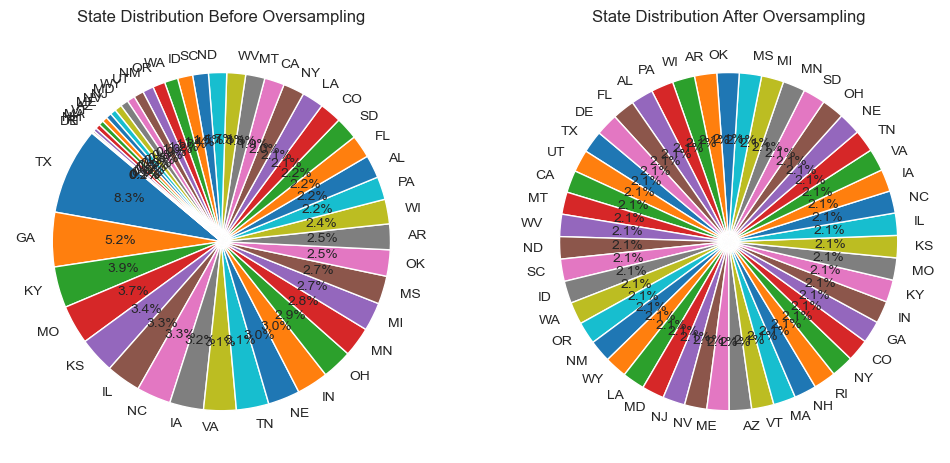

In [17]:
class_counts_before = df['state'].value_counts()
max_class_count = df['state'].value_counts().max()

oversampled_data = []
for class_label, count in df['state'].value_counts().items():
    class_data = df[df['state'] == class_label]
    oversampled_data.append(class_data.sample(max_class_count, replace=True))

df = pd.concat(oversampled_data)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(class_counts_before, labels=class_counts_before.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('State Distribution Before Oversampling')

axs[1].pie(df['state'].value_counts(), labels= df['state'].value_counts().index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('State Distribution After Oversampling')

plt.show()

We now account for data imbalance by oversampling the dataset to equalize the number of datapoints for each state. We show a pie chart of the class distribution of states before and after oversampling. 

#### 3.1.5 Data Encoding and Shuffling 

In [18]:
encoder = LabelEncoder()
df['isMetro'] = encoder.fit_transform(df['isMetro'])
df['state'] = encoder.fit_transform(df['state'])
df['county'] = encoder.fit_transform(df['county'])
df

,state,isMetro,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,avg temp,POPEST_MALE,POPEST_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
25283,39,1,414,9747.79908,9115.41432,13851.85560,14981.90520,6834.88620,10913.88648,3835.13676,69280.8804,52159.683594,1,3,61.7,2495,2503,36.1,39.6
26600,39,0,1235,7128.00000,3039.91200,10838.87184,5506.79004,3684.23544,0.00000,4484.46096,34682.2704,62824.296875,1,0,66.2,8390,6345,36.7,35.3
25996,39,0,819,10548.00000,6604.94316,13147.59840,13433.68680,6215.18772,5051.16252,5359.40220,60359.9820,56662.316406,2,1,73.4,19381,19445,34.5,37.1
24926,39,0,169,8808.00000,6297.18528,14284.38240,13733.31120,5473.20408,4667.62500,4997.06652,58260.7740,62864.343750,2,1,66.5,9225,9472,45.6,47.3
26188,39,0,926,13596.00000,11604.07548,15817.67160,19172.77200,9130.98120,10060.60764,5694.17172,85076.2788,65548.468750,2,3,68.8,9138,8816,42.0,43.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,5,1,1555,11580.00000,10763.58912,15085.67040,17175.41280,8095.96368,13806.95640,9817.17192,86324.7660,76750.109375,2,2,58.1,124347,131609,50.8,54.5
2796,5,1,847,12792.00000,7149.43584,13955.52480,14277.18600,7225.56888,9293.94648,9663.65988,74357.3208,72821.476562,2,1,57,90346,96600,37.0,40.0
2799,5,1,847,18312.00000,13528.65360,15294.26760,22971.86520,11537.12400,16467.51600,12348.07800,110459.5080,72821.476562,2,4,57,90346,96600,37.0,40.0
2800,5,1,1131,11016.42120,3558.66792,9534.05196,5689.47984,5281.12980,0.00000,6944.27340,42024.0240,94024.406250,1,0,56,279827,295667,38.1,40.5


In [19]:
df = df.apply(pd.to_numeric)
df

,state,isMetro,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,avg temp,POPEST_MALE,POPEST_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
25283,39,1,414,9747.79908,9115.41432,13851.85560,14981.90520,6834.88620,10913.88648,3835.13676,69280.8804,52159.683594,1,3,61.7,2495,2503,36.1,39.6
26600,39,0,1235,7128.00000,3039.91200,10838.87184,5506.79004,3684.23544,0.00000,4484.46096,34682.2704,62824.296875,1,0,66.2,8390,6345,36.7,35.3
25996,39,0,819,10548.00000,6604.94316,13147.59840,13433.68680,6215.18772,5051.16252,5359.40220,60359.9820,56662.316406,2,1,73.4,19381,19445,34.5,37.1
24926,39,0,169,8808.00000,6297.18528,14284.38240,13733.31120,5473.20408,4667.62500,4997.06652,58260.7740,62864.343750,2,1,66.5,9225,9472,45.6,47.3
26188,39,0,926,13596.00000,11604.07548,15817.67160,19172.77200,9130.98120,10060.60764,5694.17172,85076.2788,65548.468750,2,3,68.8,9138,8816,42.0,43.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,5,1,1555,11580.00000,10763.58912,15085.67040,17175.41280,8095.96368,13806.95640,9817.17192,86324.7660,76750.109375,2,2,58.1,124347,131609,50.8,54.5
2796,5,1,847,12792.00000,7149.43584,13955.52480,14277.18600,7225.56888,9293.94648,9663.65988,74357.3208,72821.476562,2,1,57.0,90346,96600,37.0,40.0
2799,5,1,847,18312.00000,13528.65360,15294.26760,22971.86520,11537.12400,16467.51600,12348.07800,110459.5080,72821.476562,2,4,57.0,90346,96600,37.0,40.0
2800,5,1,1131,11016.42120,3558.66792,9534.05196,5689.47984,5281.12980,0.00000,6944.27340,42024.0240,94024.406250,1,0,56.0,279827,295667,38.1,40.5


In [20]:
df.isnull().sum()

state                     0
isMetro                   0
county                    0
housing_cost              0
food_cost                 0
transportation_cost       0
healthcare_cost           0
other_necessities_cost    0
childcare_cost            0
taxes                     0
total_cost                0
median_family_income      0
adult_count               0
child_count               0
avg temp                  0
POPEST_MALE               0
POPEST_FEM                0
MEDIAN_AGE_MALE           0
MEDIAN_AGE_FEM            0
dtype: int64

In [21]:
df = df.sample(frac=1).reset_index(drop=True)
df

,state,isMetro,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,avg temp,POPEST_MALE,POPEST_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
0,43,1,870,24888.000,10280.99196,14165.52000,10175.90328,12743.11200,21271.86360,13167.46200,106692.8556,91497.390625,1,3,52.2,142851,134822,38.1,42.1
1,8,0,881,10968.000,11750.49900,15837.17280,17842.89120,8231.80812,11236.40628,8733.97632,84600.7560,69462.726562,2,3,45.8,7392,7083,43.6,46.5
2,18,0,1471,9144.000,6415.55352,13430.11680,10273.74312,5637.83976,6730.87056,6413.30496,58045.4292,68652.562500,2,1,48.8,33875,34147,41.8,44.2
3,13,0,86,8340.000,4128.41160,12680.80200,9447.96612,4517.79708,5833.31100,6431.17608,51379.4652,58468.500000,1,1,58.8,3833,3817,43.4,46.0
4,7,1,308,15169.014,4877.64144,12321.05280,7743.47172,7263.69360,8147.80008,8919.35520,64442.0268,98966.523438,1,1,60.9,139554,141724,39.2,41.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119375,38,1,1482,8640.000,4847.06136,12252.39600,7438.11036,4886.89416,7088.75460,4176.26952,49329.4860,62071.632812,1,1,59.2,10291,10198,39.9,41.7
119376,30,0,301,8964.000,8814.74928,14672.54160,14226.03960,6441.94260,16583.63280,8019.45336,77722.3596,63125.156250,2,2,48.3,62720,63307,41.9,44.5
119377,13,0,975,7956.000,8275.07004,15463.20120,18895.93200,5881.15644,10412.94360,8478.69504,75363.0000,64950.855469,2,2,58.3,5425,3676,43.1,53.9
119378,39,0,1235,7128.000,3039.91200,10838.87184,5506.79004,3684.23544,0.00000,4484.46096,34682.2704,62824.296875,1,0,66.2,8390,6345,36.7,35.3


We now finalize our data preprocessing with the following steps:

1. Check for any null values that might exist in the dataset.
2. Use Label Encoding to encode all categorical data to numeric data to be more freely usable to ML and Deep Learning Models.
3. Change Types of all columns in the dataset to be numeric in case some columns do not have the correct type despite all of them being numerical data.
4. We shuffle the dataset so that no model can find any patterns from the arrangement of the data 

#### 3.1.6 X Subset Preprocessing


In [44]:
df_x = df.drop(columns=['state', 'county'])
df_x = df_x.astype('float64')
df_x

,isMetro,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,avg temp,POPEST_MALE,POPEST_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
0,1.0,24888.000,10280.99196,14165.52000,10175.90328,12743.11200,21271.86360,13167.46200,106692.8556,91497.390625,1.0,3.0,52.2,142851.0,134822.0,38.1,42.1
1,0.0,10968.000,11750.49900,15837.17280,17842.89120,8231.80812,11236.40628,8733.97632,84600.7560,69462.726562,2.0,3.0,45.8,7392.0,7083.0,43.6,46.5
2,0.0,9144.000,6415.55352,13430.11680,10273.74312,5637.83976,6730.87056,6413.30496,58045.4292,68652.562500,2.0,1.0,48.8,33875.0,34147.0,41.8,44.2
3,0.0,8340.000,4128.41160,12680.80200,9447.96612,4517.79708,5833.31100,6431.17608,51379.4652,58468.500000,1.0,1.0,58.8,3833.0,3817.0,43.4,46.0
4,1.0,15169.014,4877.64144,12321.05280,7743.47172,7263.69360,8147.80008,8919.35520,64442.0268,98966.523438,1.0,1.0,60.9,139554.0,141724.0,39.2,41.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119375,1.0,8640.000,4847.06136,12252.39600,7438.11036,4886.89416,7088.75460,4176.26952,49329.4860,62071.632812,1.0,1.0,59.2,10291.0,10198.0,39.9,41.7
119376,0.0,8964.000,8814.74928,14672.54160,14226.03960,6441.94260,16583.63280,8019.45336,77722.3596,63125.156250,2.0,2.0,48.3,62720.0,63307.0,41.9,44.5
119377,0.0,7956.000,8275.07004,15463.20120,18895.93200,5881.15644,10412.94360,8478.69504,75363.0000,64950.855469,2.0,2.0,58.3,5425.0,3676.0,43.1,53.9
119378,0.0,7128.000,3039.91200,10838.87184,5506.79004,3684.23544,0.00000,4484.46096,34682.2704,62824.296875,1.0,0.0,66.2,8390.0,6345.0,36.7,35.3


In [45]:
df_x_cols = df_x.columns
scaler = StandardScaler()
df_x = scaler.fit_transform(df_x)
df_x

array([[ 1.19501102,  2.70506435,  0.4888507 , ...,  0.32526266,
        -0.58293409, -0.25511604],
       [-0.83681237, -0.20375326,  0.91726075, ..., -0.33016161,
         0.43872132,  0.53480283],
       [-0.83681237, -0.58490867, -0.63805281, ..., -0.19129718,
         0.10436137,  0.12189069],
       ...,
       [-0.83681237, -0.8331612 , -0.09594207, ..., -0.3476428 ,
         0.34584356,  1.86330275],
       [-0.83681237, -1.0061857 , -1.62216428, ..., -0.33394826,
        -0.84299183, -1.47589975],
       [-0.83681237, -0.40185376, -0.12042914, ..., -0.35614481,
         2.16624775,  1.59401223]])

In [46]:
df_x = df_x - df_x.min().min()
df_x

array([[7.93240484, 9.44245817, 7.22624452, ..., 7.06265648, 6.15445973,
        6.48227778],
       [5.90058145, 6.53364056, 7.65465456, ..., 6.40723221, 7.17611514,
        7.27219665],
       [5.90058145, 6.15248515, 6.099341  , ..., 6.54609663, 6.84175519,
        6.85928451],
       ...,
       [5.90058145, 5.90423261, 6.64145175, ..., 6.38975101, 7.08323738,
        8.60069657],
       [5.90058145, 5.73120812, 5.11522953, ..., 6.40344556, 5.89440199,
        5.26149406],
       [5.90058145, 6.33554005, 6.61696467, ..., 6.38124901, 8.90364157,
        8.33140605]])

We separate out all labels from the original dataframe and put in into a new dataframe. Then wo do the following transformations to the new Dataset:

1. We convert all columns to float64. This is done so that all columns in the dataframe share a type to make future transformations easier.
2. We scale the data using a Standard Scaler. This is done because most of the columns contains data that are not on similar scales, which might lead to errors for several machine learning algorithms.
3. We then shift the scaled values to only contain positive values. This is done by subtracting the lowest negative value from all datapoints. This way, the lowest value in the dataframe becomes 0, thereby placing all other datapoints on the positive scales. This is done because some algorithms like Naive Bayes work best on positive values. 

#### 3.1.7 Y Subset Preprocessing

In [25]:
df_y = df[['state', 'county']]
df_y = df_y.astype('int64')
df_y

,state,county
0,43,870
1,8,881
2,18,1471
3,13,86
4,7,308
...,...,...
119375,38,1482
119376,30,301
119377,13,975
119378,39,1235


We then seperate out the labels into their own dataframe. Note that since we are only predicting states, we only use the states columns for all predictions.

#### 3.1.8 Train Test Split

In [26]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(df_x, df_y, test_size=0.33, random_state=42, stratify=df_y['state'])
x_train_s

array([[5.90058145, 6.34055526, 6.69109468, ..., 6.49007676, 8.29064832,
        8.33140605],
       [7.93240484, 7.89738904, 8.15623091, ..., 6.7069575 , 7.67765507,
        7.8287304 ],
       [7.93240484, 6.45763333, 6.3408987 , ..., 6.385441  , 6.58169745,
        6.50023048],
       ...,
       [5.90058145, 6.87467435, 8.14692657, ..., 6.38123874, 7.60335286,
        7.8287304 ],
       [7.93240484, 7.15262892, 6.93000469, ..., 7.43971566, 5.82009978,
        5.96164943],
       [5.90058145, 6.92984158, 7.51592038, ..., 6.4096335 , 5.93155309,
        5.80007511]])

#### 3.1.9 Tensor Dataset and Dataloader for Pytorch

In [27]:
x_train_sr = torch.FloatTensor(x_train_s)
x_test_sr = torch.FloatTensor(x_test_s)
x_train_sr

tensor([[5.9006, 6.3406, 6.6911,  ..., 6.4901, 8.2906, 8.3314],
        [7.9324, 7.8974, 8.1562,  ..., 6.7070, 7.6777, 7.8287],
        [7.9324, 6.4576, 6.3409,  ..., 6.3854, 6.5817, 6.5002],
        ...,
        [5.9006, 6.8747, 8.1469,  ..., 6.3812, 7.6034, 7.8287],
        [7.9324, 7.1526, 6.9300,  ..., 7.4397, 5.8201, 5.9616],
        [5.9006, 6.9298, 7.5159,  ..., 6.4096, 5.9316, 5.8001]])

In [28]:
y_train_sr = torch.LongTensor(y_train_s['state'].values)
y_test_sr = torch.LongTensor(y_test_s['state'].values)
y_train_sr

tensor([ 3, 15, 39,  ..., 25,  1, 32])

In [29]:
n_states = len(np.unique(df_y['state']))
n_states

47

In [30]:
input_dim = df_x.shape[1]
input_dim

17

In [31]:
train_db_s = TensorDataset(x_train_sr, y_train_sr)
data_loader_s = DataLoader(train_db_s, batch_size=n_states, shuffle=False)

We then split the x and y dataframes into train test sets to be used by the models. These sets are then turned into tensors for use in our custom neural network.

#### 3.1.10 Exploratory Data Analysis


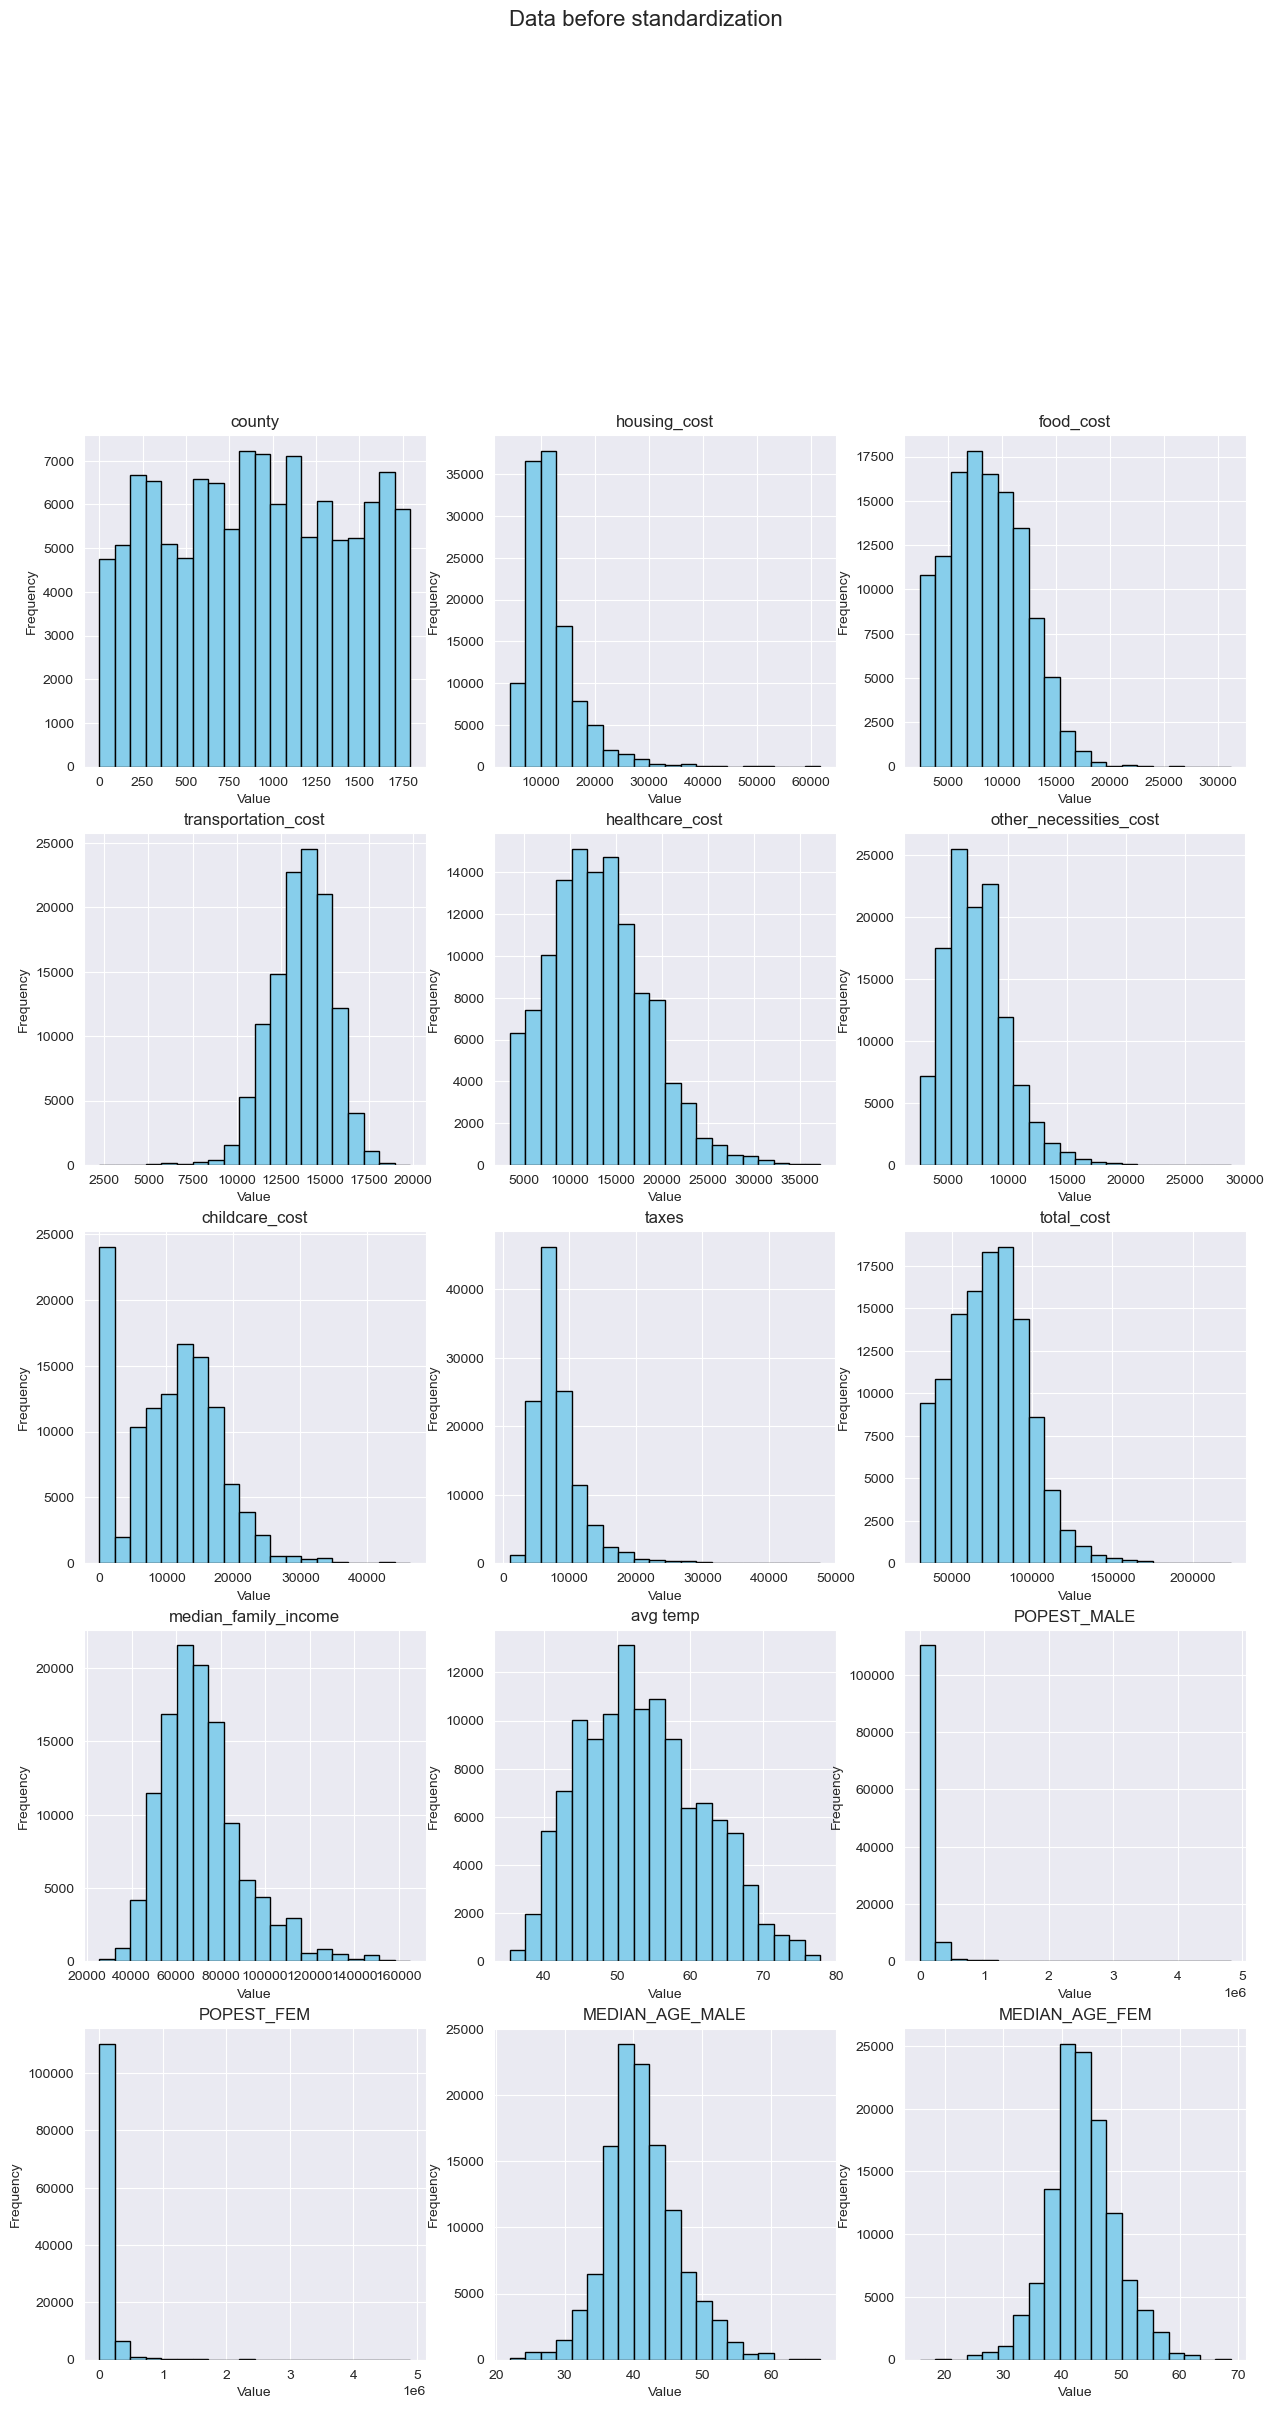

In [108]:
temp = df.copy()
temp = temp.drop(columns=['state', 'isMetro'])

cols_to_drop = temp.columns[(temp.nunique() < 10)]
temp = temp.drop(columns=cols_to_drop)

fig, axes = plt.subplots(nrows=int(np.ceil(len(temp.columns) / 3)), ncols=3, figsize=(15, 25))

axes = axes.flatten()
for i, col in enumerate(temp.columns):
    axes[i].hist(temp[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.suptitle('Data before standardization', y=1.05, fontsize=16)


plt.savefig('graph/before_standard.png')
plt.show()

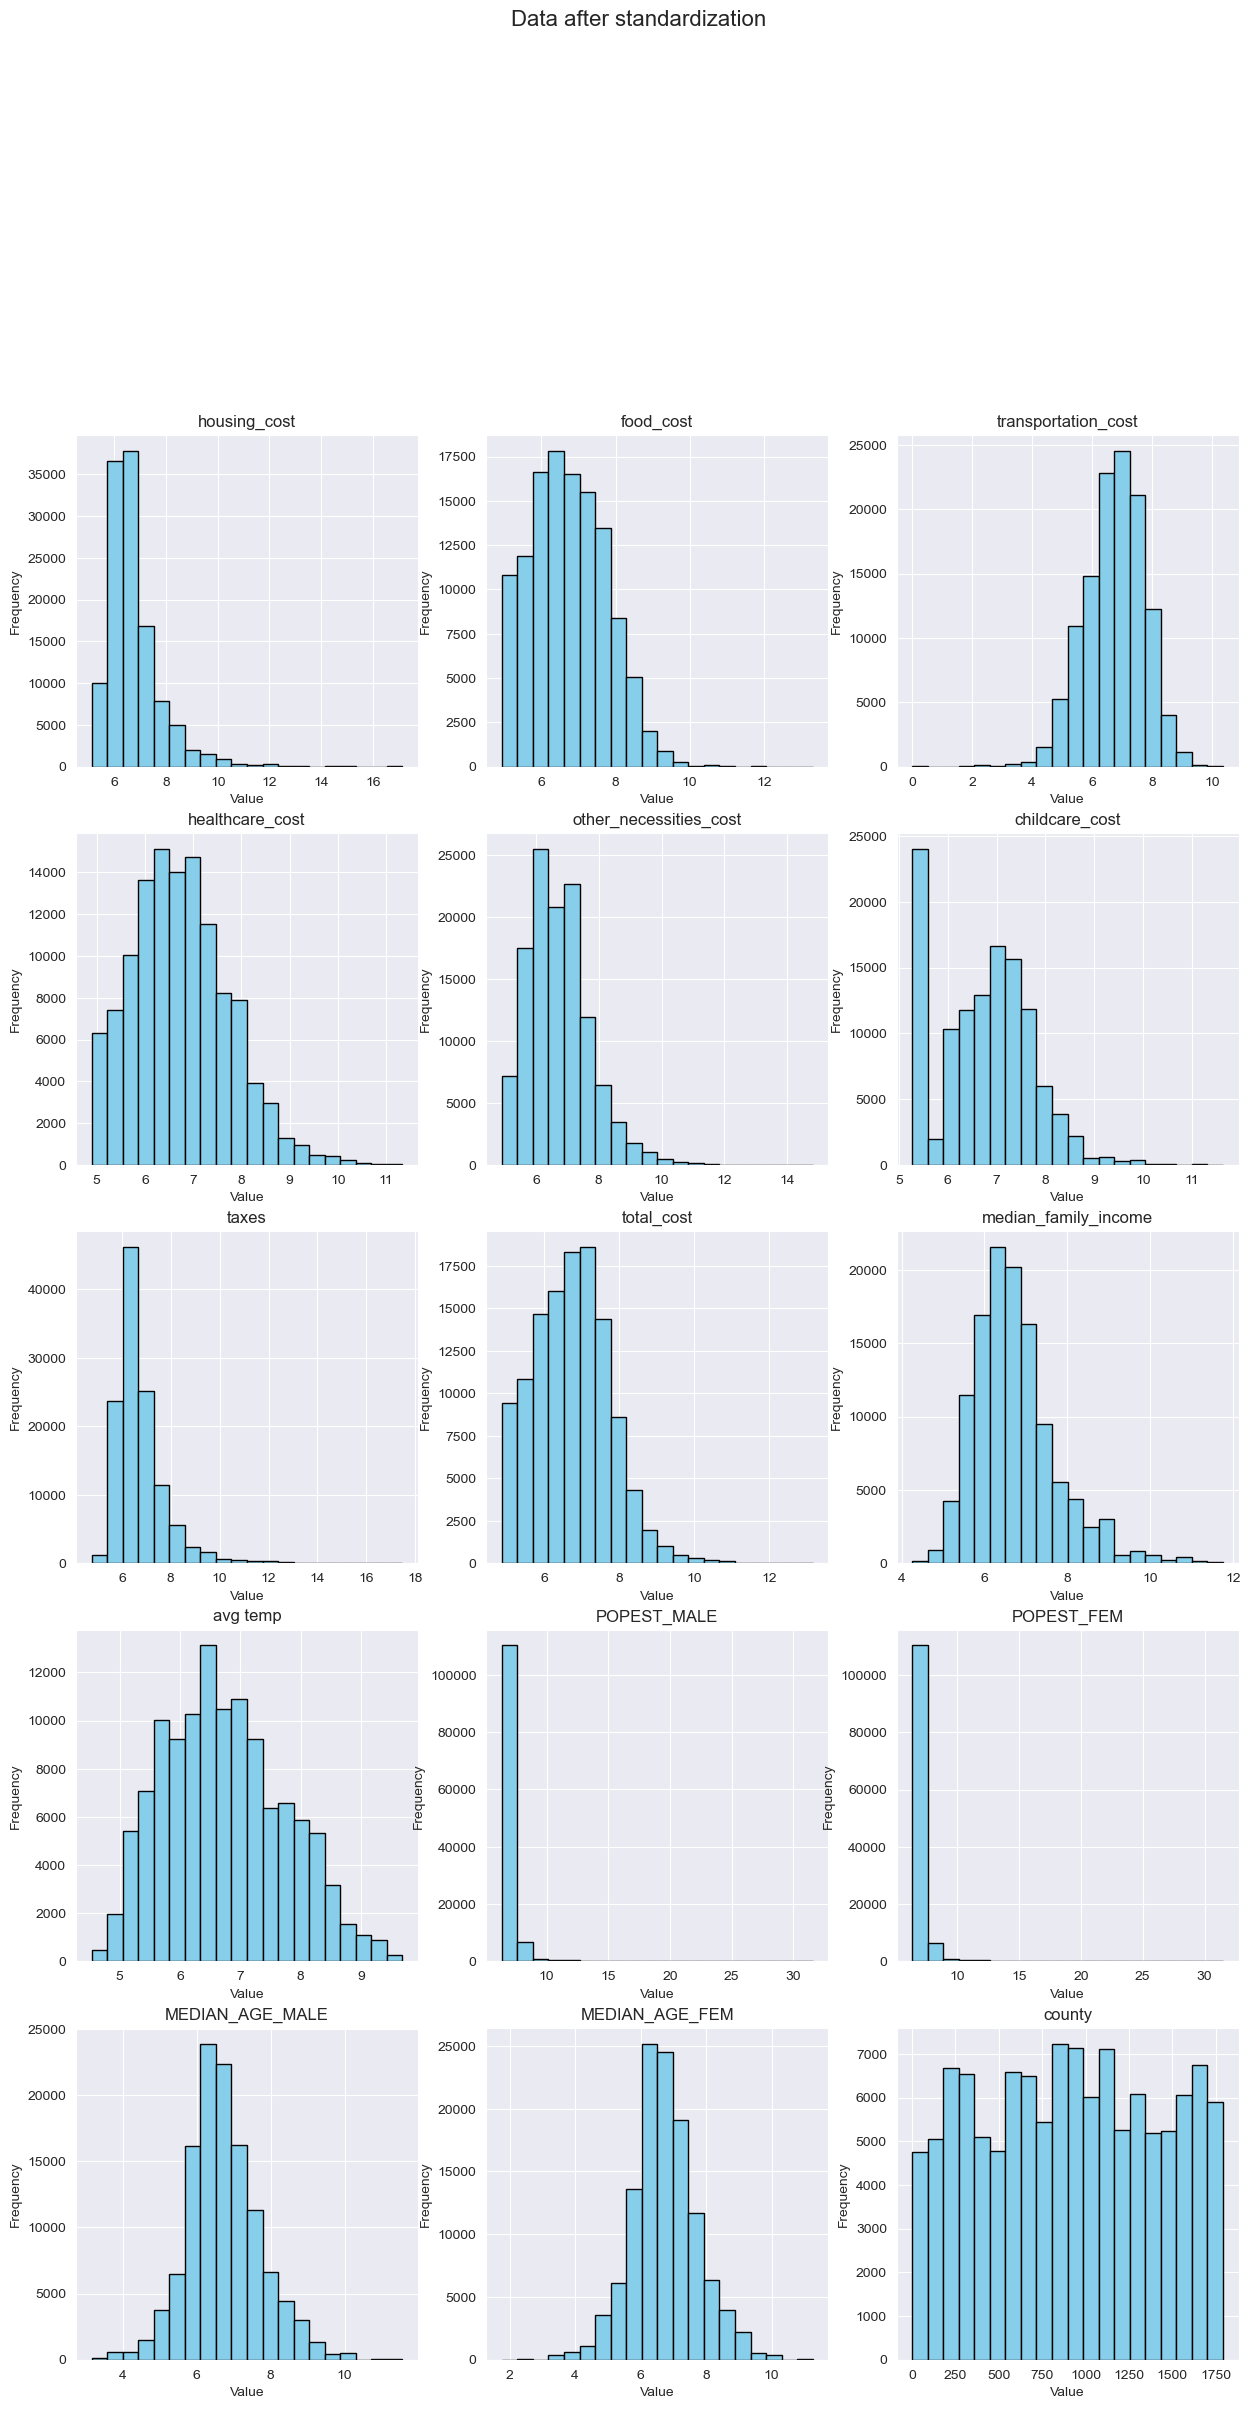

In [113]:
tdf_x = pd.DataFrame(df_x, columns=df_x_cols)
temp = pd.concat([tdf_x, df_y])

temp = temp.drop(columns=['state', 'isMetro'])

cols_to_drop = temp.columns[(temp.nunique() < 10)]
temp = temp.drop(columns=cols_to_drop)


fig, axes = plt.subplots(nrows=int(np.ceil(len(temp.columns) / 3)), ncols=3, figsize=(15, 25))

axes = axes.flatten()
for i, col in enumerate(temp.columns):
    axes[i].hist(temp[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.suptitle('Data after standardization', y=1.05, fontsize=16)


plt.savefig('graph/after_standard.png')
plt.show()

The two graphs above show histograms for the columns of the dataframe before and after the standardization process. To this end we did not categorical columns, columns with less than 10 unique points to make graphs easier to understand. 

We can immediately notice that the graphs from before the standardization process and after it seem almost the same. This proves that even though the values of the data points were changed during standardization, it still managed to preserve its qualities.

Regarding the graphs themselves, we can see that most of the histograms are skewed to the left. This is true for most of the datapoint that relates to cost of living itself, which shows that most people keep their costs low while others might spend a lot more for a variety of reasons. This goes for income too where some people might be getting paid significantly more than others. A notable exception is the transportation cost, which seems to be slightly right leaning, hinting that most people spend more on their transportation on average. The population estimates on the other hand seem to be heavily left leaning, hinting that most counties are not very populated. The age distributions on the other hand seem to be centered, suggesting a normalized distribution of ages. The counties graph seem to be the most even, which shows that we have ample exaples from each county no matter the feature.  

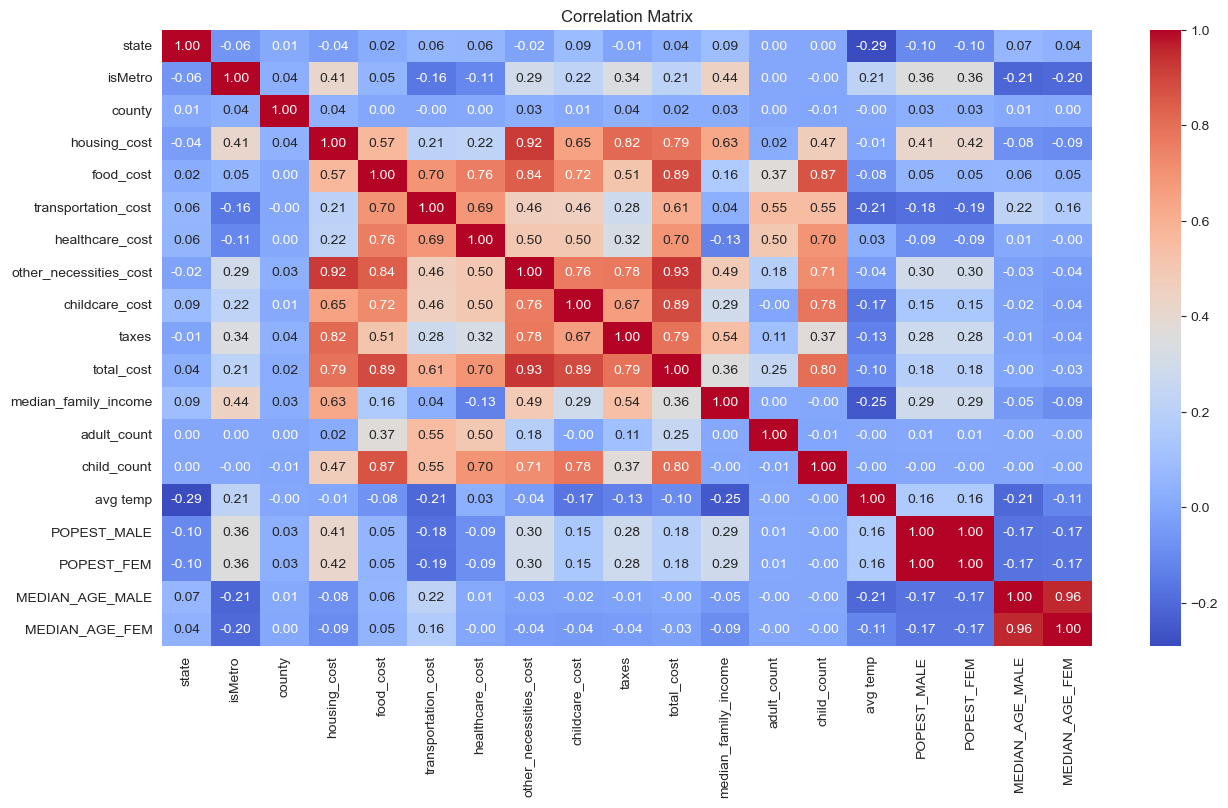

In [109]:
fig = plt.figure(figsize=(15, 8))
temp = df.copy()

correlation_matrix = temp.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

plt.savefig('graph/cor.png')
plt.show()

The correlation matrix above shows us how each feature is linked to one another. From the outset, we can a hotspot forming around the features relating to cost and incomes. This shows that cahnges in each type of cost and income might also result in changes to other types of cost or income. The number of children also seem to be heavily liked to various types of costs, signaling the additional costs of raising children in each household. 

We also see very high correlation for our population estimates and age distribution. While these might seem off, we hava to remember that the population estimates are for each county and as such come in pairs for each county. This results in them being very hightly linked as most counties population estimates are unique and as such result in highly correlated pairs. The population estimates are also highly correlated in housing costs, which hists at the higher cost of housing in densely populated areas and vice versa.

Most significantly, we can see no clear correlation between the state and other features, signaling the fact that we need all the features we can get to conjure an accurate prediction for the best state.

### 3.2 Model development and training 

In [81]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#### 3.2.1 Logistic Regression

In [33]:
logreg_classifier = LogisticRegression(multi_class='multinomial')
logreg_classifier.fit(x_train_s, y_train_s['state'])
logreg_pred =  logreg_classifier.predict(x_test_s)

C:\Users\riasa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We use Multonomial logistic regression model for the  prediction of states.

#### 3.2.2  Classifier


In [34]:
svm_classifier = SVC(kernel='linear', decision_function_shape='ovr')
svm_classifier.fit(x_train_s, y_train_s['state'])
svm_pred = svm_classifier.predict(x_test_s)

In [35]:
svm_classifier = SVC(kernel='linear', decision_function_shape='ovo')
svm_classifier.fit(x_train_s, y_train_s['state'])
svm_pred_ova = svm_classifier.predict(x_test_s)

We use Multonomial logistic regression model for the  prediction of states. We use both the one-vs-all and one-vs-one strategies.

#### 3.2.3 Naive Bayes Classifier


In [36]:
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train_s, y_train_s['state'])
nb_pred = nb_classifier.predict(x_test_s)

We use Multonomial Naive Bayes model for the  prediction of states.

#### 3.2.4 Custom Neural Network

In [37]:
class Net(nn.Module):
    def __init__(self, os):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.elu1 = nn.ELU()
        self.fc2 = nn.Linear(32, 64)
        self.elu2 = nn.ELU()
        self.fc3 = nn.Linear(64, 128)
        self.elu3 = nn.ELU()
        self.fc4 = nn.Linear(128, 256)
        self.elu4 = nn.ELU()
        self.fc5 = nn.Linear(256, 512)
        self.elu5 = nn.ELU()
        self.fc6 = nn.Linear(512, 1024)
        self.elu6 = nn.ELU()
        self.fc7 = nn.Linear(1024, os)

    def forward(self, x):
        x = self.fc1(x)
        x = self.elu1(x)
        x = self.fc2(x)
        x = self.elu2(x)
        x = self.fc3(x)
        x = self.elu3(x)
        x = self.fc4(x)
        x = self.elu4(x)
        x = self.fc5(x)
        x = self.elu5(x)
        x = self.fc6(x)
        x = self.elu6(x)
        x = self.fc7(x)
        return x

In [38]:
model_s = Net(n_states)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_s.parameters(), lr=0.00001)

train_acc = []
train_pre = []
train_rec = []
train_f1 = []
train_loss = []

epochs = 100

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_s = model_s.to(device)

for epoch in range(epochs):
    output1 = model_s(x_train_sr.to(device))
    total_loss = 0.00
    correct_predictions = 0
    total_samples = 0
    
    all_labels = []
    all_preds = []

    for batch_idx, (inputs, labels) in enumerate(data_loader_s, 1):
        model_s.train()
        inputs ,labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model_s(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()
        
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

        if batch_idx % 100 == 0 or batch_idx == len(data_loader_s):
            avg_l = total_loss / batch_idx
            avg_acc = correct_predictions/total_samples
            print('Epoch', epoch+1, '/', epochs, 'Batch', batch_idx, '/', len(data_loader_s), 'Loss', avg_l, 'Batch Accuracy', avg_acc)



    avg_e_loss = total_loss / len(data_loader_s)
    acc =  accuracy_score(all_labels, all_preds)
    
    train_acc.append(accuracy_score(all_labels, all_preds))
    train_pre.append(precision_score(all_labels, all_preds, average='macro', zero_division=0.0))
    train_rec.append(recall_score(all_labels, all_preds, average='macro' ,zero_division=0.0))
    train_f1.append(f1_score(all_labels, all_preds, average='macro',zero_division=0.0))
    train_loss.append(avg_e_loss)
    print('====================================================')
    print('Epoch', epoch+1, '/', epochs, 'Average Loss: ', avg_e_loss, 'Average Accuracy for Epoch', acc)
    print('====================================================')

Epoch 1 / 100 Batch 100 / 1702 Loss 3.848763601779938 Batch Accuracy 0.02170212765957447
Epoch 1 / 100 Batch 200 / 1702 Loss 3.847907691001892 Batch Accuracy 0.02319148936170213
Epoch 1 / 100 Batch 300 / 1702 Loss 3.845699876944224 Batch Accuracy 0.02673758865248227
Epoch 1 / 100 Batch 400 / 1702 Loss 3.843063171505928 Batch Accuracy 0.026648936170212766
Epoch 1 / 100 Batch 500 / 1702 Loss 3.8402017664909365 Batch Accuracy 0.02719148936170213
Epoch 1 / 100 Batch 600 / 1702 Loss 3.836394664446513 Batch Accuracy 0.030354609929078014
Epoch 1 / 100 Batch 700 / 1702 Loss 3.830868775163378 Batch Accuracy 0.03340425531914894
Epoch 1 / 100 Batch 800 / 1702 Loss 3.822875124514103 Batch Accuracy 0.037686170212765956
Epoch 1 / 100 Batch 900 / 1702 Loss 3.810990570121341 Batch Accuracy 0.04070921985815603
Epoch 1 / 100 Batch 1000 / 1702 Loss 3.7930036475658415 Batch Accuracy 0.04421276595744681
Epoch 1 / 100 Batch 1100 / 1702 Loss 3.771530314358798 Batch Accuracy 0.046073500967117986
Epoch 1 / 100

For our custom neural network, we opted for a moderately complex network, with 5 hidden layers between the input and output layers. We used ELU activation function for these hidden layers to avoid the dying relu problem, which occurs when the relu activation function outputs only 0 for all inputs. We used Cross Entropy loss for multi classification. We also used Adam optimizer as it tends to be the most well rounded optimizer for neural networks. We train our model with a learning rate of 1X10^-4 for 100 epochs. This ensures that the model will be able to slowly learn the patterns hidden in the data without a high risk of overfitting on the training data.

### 3.3 Model evaluation

#### 3.3.1 Evaluation of Logistic Regression 


In [39]:
print("Logistic Regression Accuracy", accuracy_score(y_test_s['state'], logreg_pred))
print("Logistic Regression Precision", precision_score(y_test_s['state'], logreg_pred, average='macro'))
print("Logistic Regression  Recall", recall_score(y_test_s['state'], logreg_pred, average='macro'))
print("Logistic Regression F1 Score", f1_score(y_test_s['state'], logreg_pred, average='macro'))

Logistic Regression Accuracy 0.5970149253731343
Logistic Regression Precision 0.5916306448637528
Logistic Regression  Recall 0.5970274827057792
Logistic Regression F1 Score 0.5907719547228131


Here we see that our logistic regressor model gets low scores across the board. This might signal complex relationships between data and a relatively high amount of outliers in the data.

#### 3.3.2 Evaluation of  SVM Classifier


In [40]:
print("SVM Classifier Accuracy", accuracy_score(y_test_s['state'], svm_pred))
print("SVM Classifier Precision", precision_score(y_test_s['state'], svm_pred, average='macro'))
print("SVM Classifier Recall", recall_score(y_test_s['state'], svm_pred, average='macro'))
print("SVM Classifier F1 Score", f1_score(y_test_s['state'], svm_pred, average='macro'))

SVM Classifier Accuracy 0.8491217382475378
SVM Classifier Precision 0.8500523015293695
SVM Classifier Recall 0.8491280064363422
SVM Classifier F1 Score 0.8483606766363914


In [41]:
print("SVM Classifier Accuracy", accuracy_score(y_test_s['state'], svm_pred_ova))
print("SVM Classifier Precision", precision_score(y_test_s['state'], svm_pred_ova, average='macro'))
print("SVM Classifier Recall", recall_score(y_test_s['state'], svm_pred_ova, average='macro'))
print("SVM Classifier F1 Score", f1_score(y_test_s['state'], svm_pred_ova, average='macro'))

SVM Classifier Accuracy 0.8491217382475378
SVM Classifier Precision 0.8500523015293695
SVM Classifier Recall 0.8491280064363422
SVM Classifier F1 Score 0.8483606766363914


Our SVM Model on the other hand, does very well with our data using both one vs all and one vs one stratagies. This might signify outliers in the data which SVM's are more resistant to. This also shows that the data is balanced with examples for all kinds of classes and its features contain the appropriate information for drawing a good decision boundary. 

#### 3.3.3 Evaluation of Naive Bayes Classifier

In [93]:
print("Naive Bayes Accuracy", accuracy_score(y_test_s['state'], nb_pred))
print("Naive Bayes Precision", precision_score(y_test_s['state'], nb_pred, average='macro'))
print("Naive Bayes Recall", recall_score(y_test_s['state'], nb_pred, average='macro'))
print("Naive Bayes F1 Score", f1_score(y_test_s['state'], nb_pred, average='macro'))

Naive Bayes Accuracy 0.2580465021829627
Naive Bayes Precision 0.3024540493194654
Naive Bayes Recall 0.2580475919185481
Naive Bayes F1 Score 0.24896686237197324


Our Naive Bayes Model performs the worst so far, with it not being able to cross the 50% threshold. This might indicate that the datapoints are not conditionally independent, leading to many wrong predictions by the model.

#### 3.3.4 Evaluation of  Custom Neural Network

In [43]:
test_db_s = TensorDataset(x_test_sr, y_test_sr)
data_loader_test_s = DataLoader(test_db_s, batch_size=n_states, shuffle=False)

In [44]:
model_s.eval()
total_loss = 0.0

nn_pred = []
nn_true = []

test_acc = []
test_pre = []
test_rec = []
test_f1 = []


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_s.to(device)


with torch.no_grad():
    for inputs, labels in data_loader_test_s:
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = model_s(inputs)
        nn_pred.extend(torch.argmax(outputs, dim=1).cpu().numpy())
        nn_true.extend(labels.cpu().numpy())

test_acc.append(accuracy_score(nn_true, nn_pred))
test_pre.append(precision_score(nn_true, nn_pred, average='macro', zero_division=0.0))
test_rec.append(recall_score(nn_true, nn_pred, average='macro' ,zero_division=0.0))
test_f1.append(f1_score(nn_true, nn_pred, average='macro',zero_division=0.0))

In [45]:
classes = label_s

print("Average Testing Accuracy ", test_acc[0])
print("Latest Testing Accuracy ", train_acc[-1])
print('===================================================================')
print("Average Testing Precision ", test_pre[0])
print("Latest Testing Precision ", train_pre[-1])
print('===================================================================')
print("Average Testing Recall ",test_rec[0])
print("Latest Testing Recall ", train_rec[-1])
print('===================================================================')
print("Average Testing F1 Score",test_f1[0])
print("Latest Testing F1 Score ", train_f1[-1])
print('===================================================================')

Average Testing Accuracy  0.92181947405828
Latest Testing Accuracy  0.9330991198239648
Average Testing Precision  0.9243464321184717
Latest Testing Precision  0.9328505146339727
Average Testing Recall  0.921823137726679
Latest Testing Recall  0.9330971942237233
Average Testing F1 Score 0.9217830752734598
Latest Testing F1 Score  0.932763991639941


Here for our custom neural network, we can see the highest scores of any model trained so far. This high accuracy shows that most its its predictions are correct, signifying its overall performance. The high precision and recall show that the model is great at minimizing false positives while being good at predicting actually positive instances of each class. The high F1 score also confirms that the model also has a good balance of its precision and recall scores.

The training scores being very close to actual test scores also signify that the model has not been overfitted to the training data even with the large number of epochs.

### 3.4 Analysis 

#### 3.4.1 Analysis of Logistic Regression

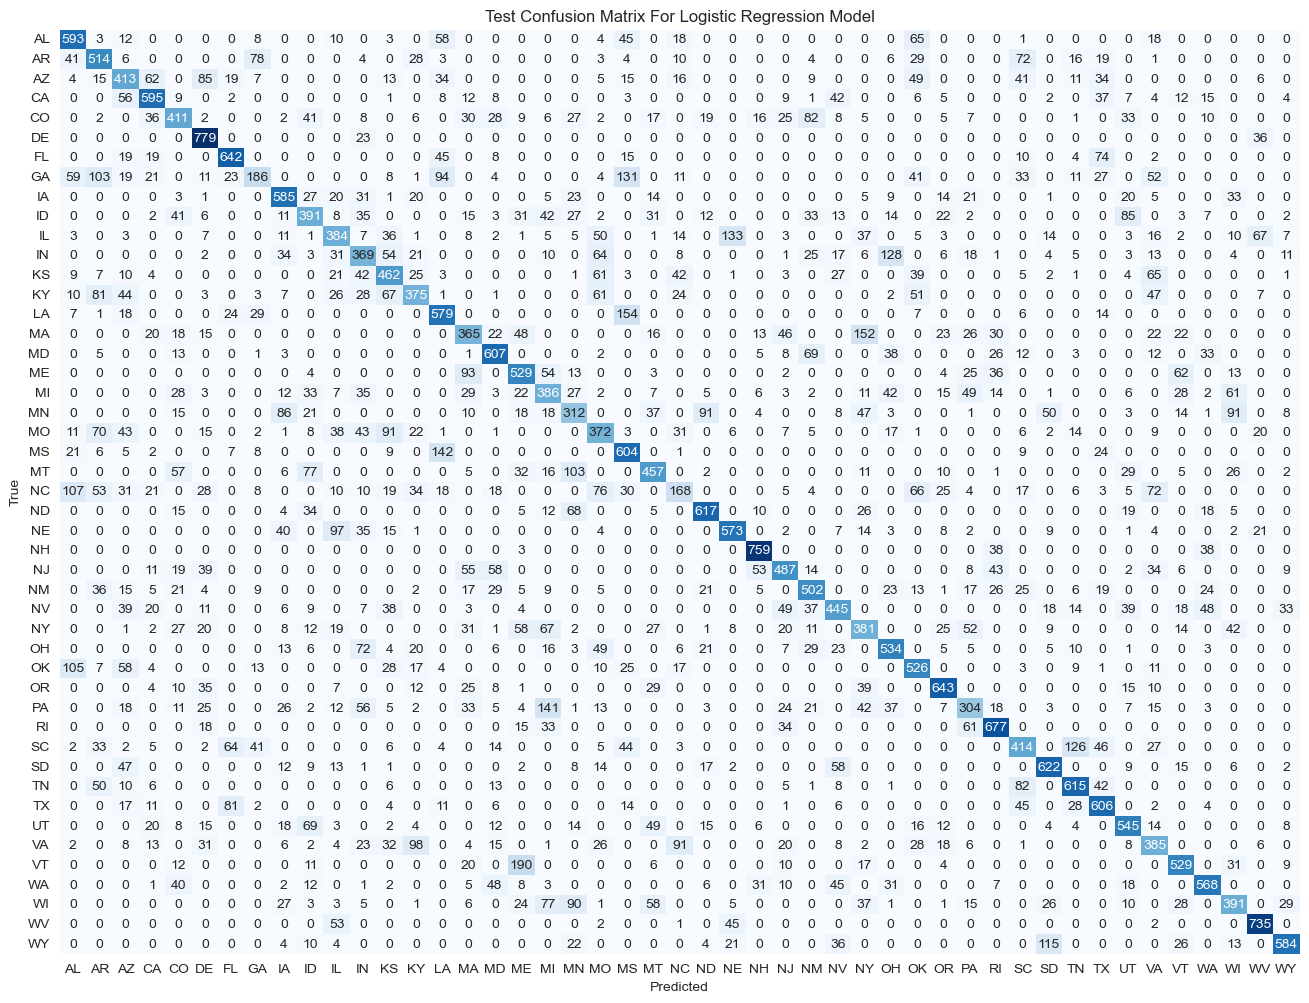

In [67]:
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix(y_test_s['state'], logreg_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix For Logistic Regression Model')

plt.savefig('graph/cm_logistic.png')
plt.show()

Looking at the confusion matrix of the logistic regression model, we can see that it makes a lot of correct predictions as evidenced by the diagonal line for all true positive instances. But as evidenced by the number of predictions outside the diagonal line, the model also has a lot of false positive and negative instances. The number of correct and incorrect predictions seems to be almost even, with more correct predictions.  

#### 3.4.2 Analysis of SVM Classifier

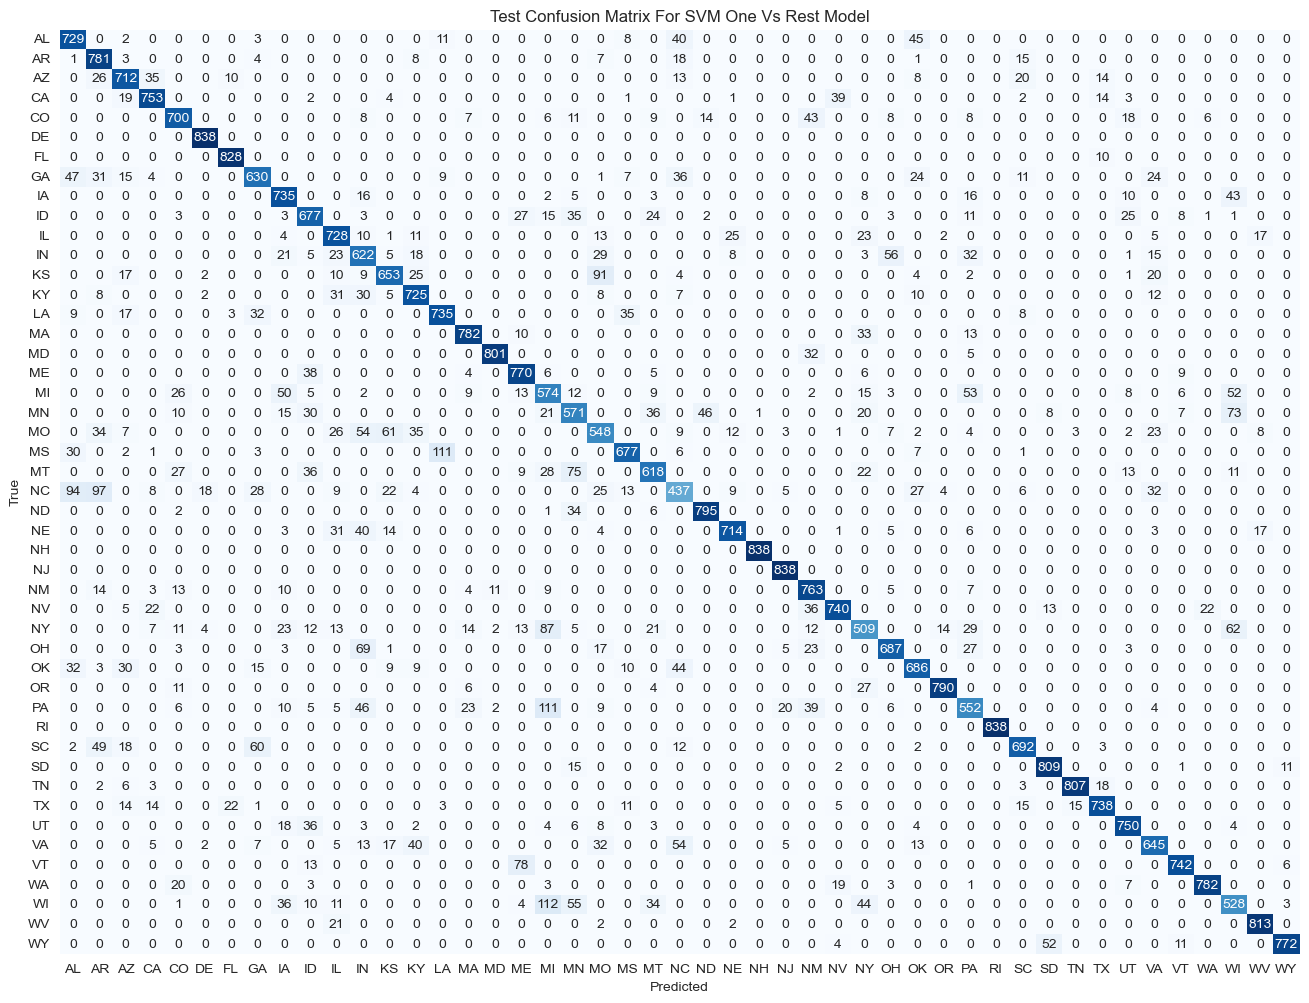

In [68]:
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix(y_test_s['state'], svm_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix For SVM One Vs Rest Model')
plt.savefig('graph/cm_svm_ovr.png')
plt.show()

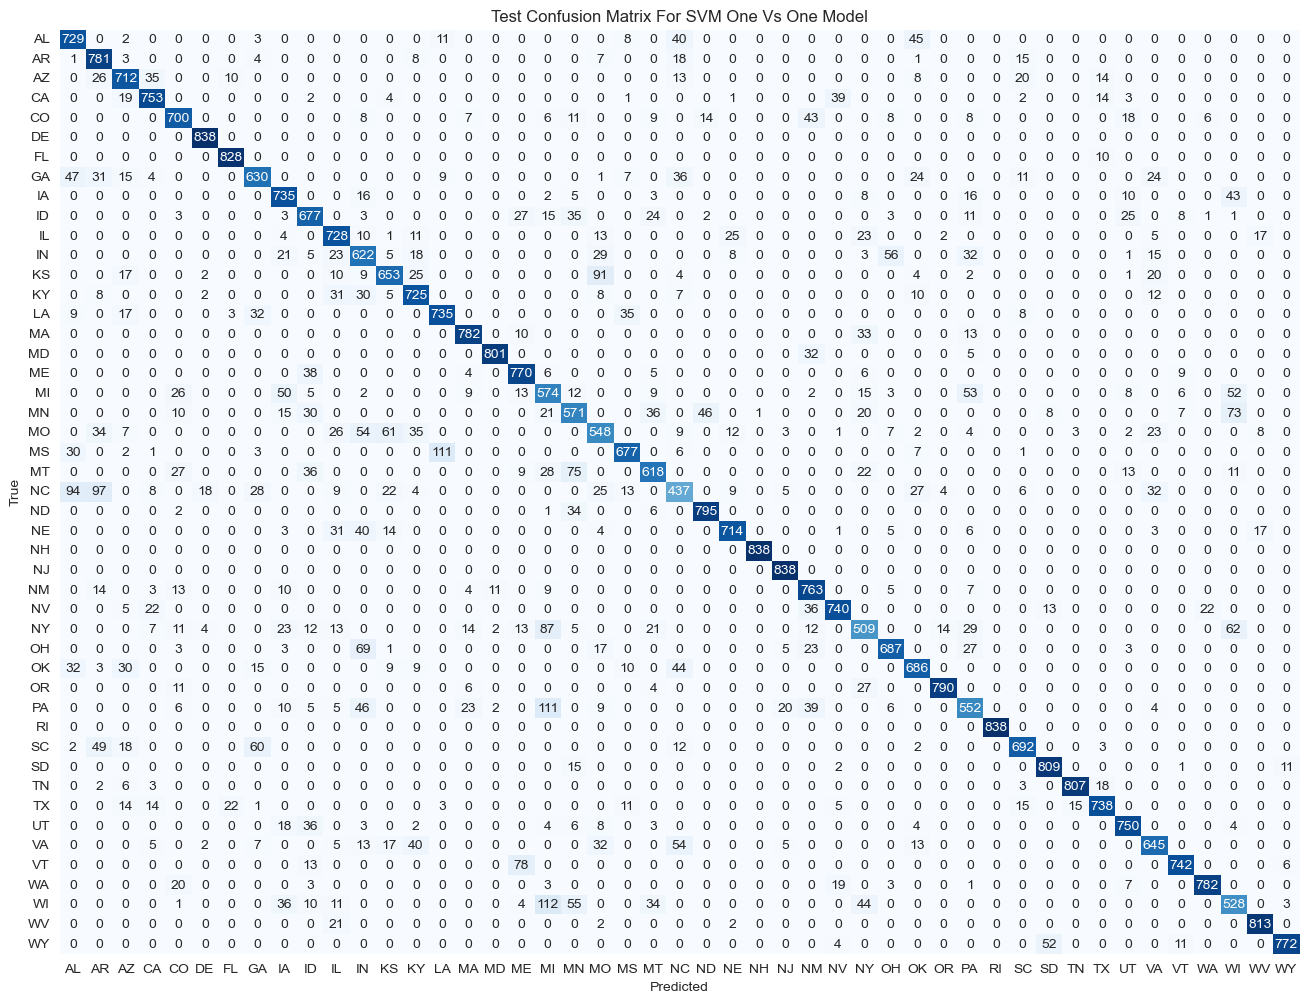

In [69]:
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix(y_test_s['state'], svm_pred_ova), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix For SVM One Vs One Model')
plt.savefig('graph/cm_ovo.png')
plt.show()

Now we see that for both SVM models, the confusion matrix is a lot cleaner than the Logistic Regression Model. The models' higher accuracy, precision, recall and f1 scores is evidenced by the strong diagonal line going through the confusion matrix. Although better, These models still have some false negative and positive instances as shown by the number of predictions outside the diagonal line. Even with the high scores, we can see that both models often times confuse similar classes, leading to higher false negative predictions. This is clearly seen in the data for the 'MO' state, which while having a relatively high number of correct predictions, the mistakes it makes are all for similar classes.

#### 3.4.3 Analysis of Naive Bayes

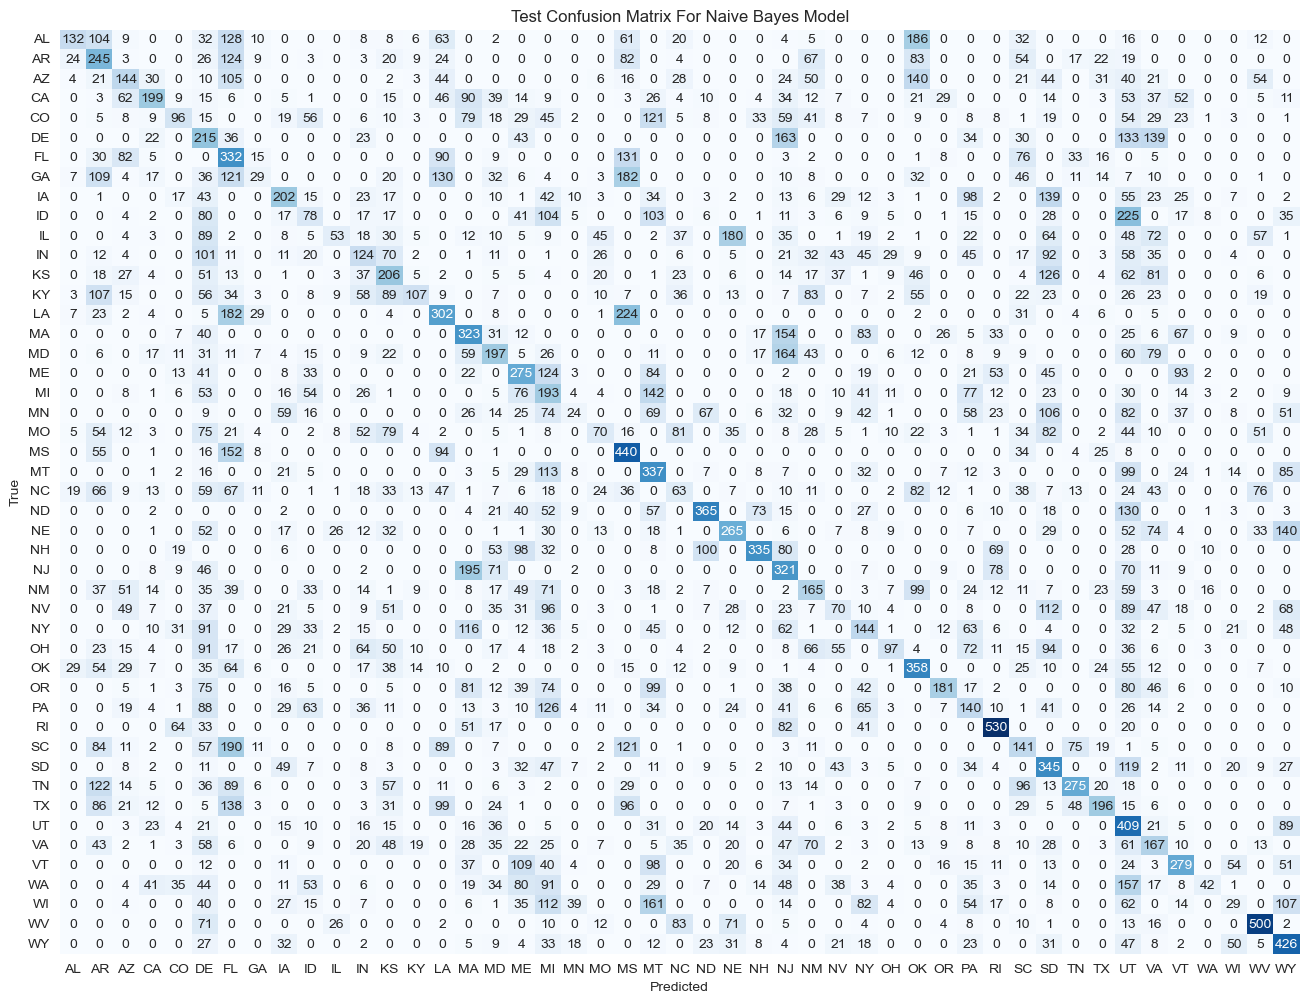

In [70]:
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix(y_test_s['state'], nb_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix For Naive Bayes Model')
plt.savefig('graph/cm_bayes.png')
plt.show()

The Naive Bayes is seems to be the worst model so far, as shown by its messy confusion model. Unlike other models, there is no clear diagonal line. Instead it seems that the diagonal is often broken in several points, where the model's predictions seem completely wrong. This shows that the Naive bayes model, while being good for some classes, completely breaks down for other classes. This leads to a messy confusion matrix with its predictions being all over the place.

#### 3.2.4 Analysis of Custom Neural Network

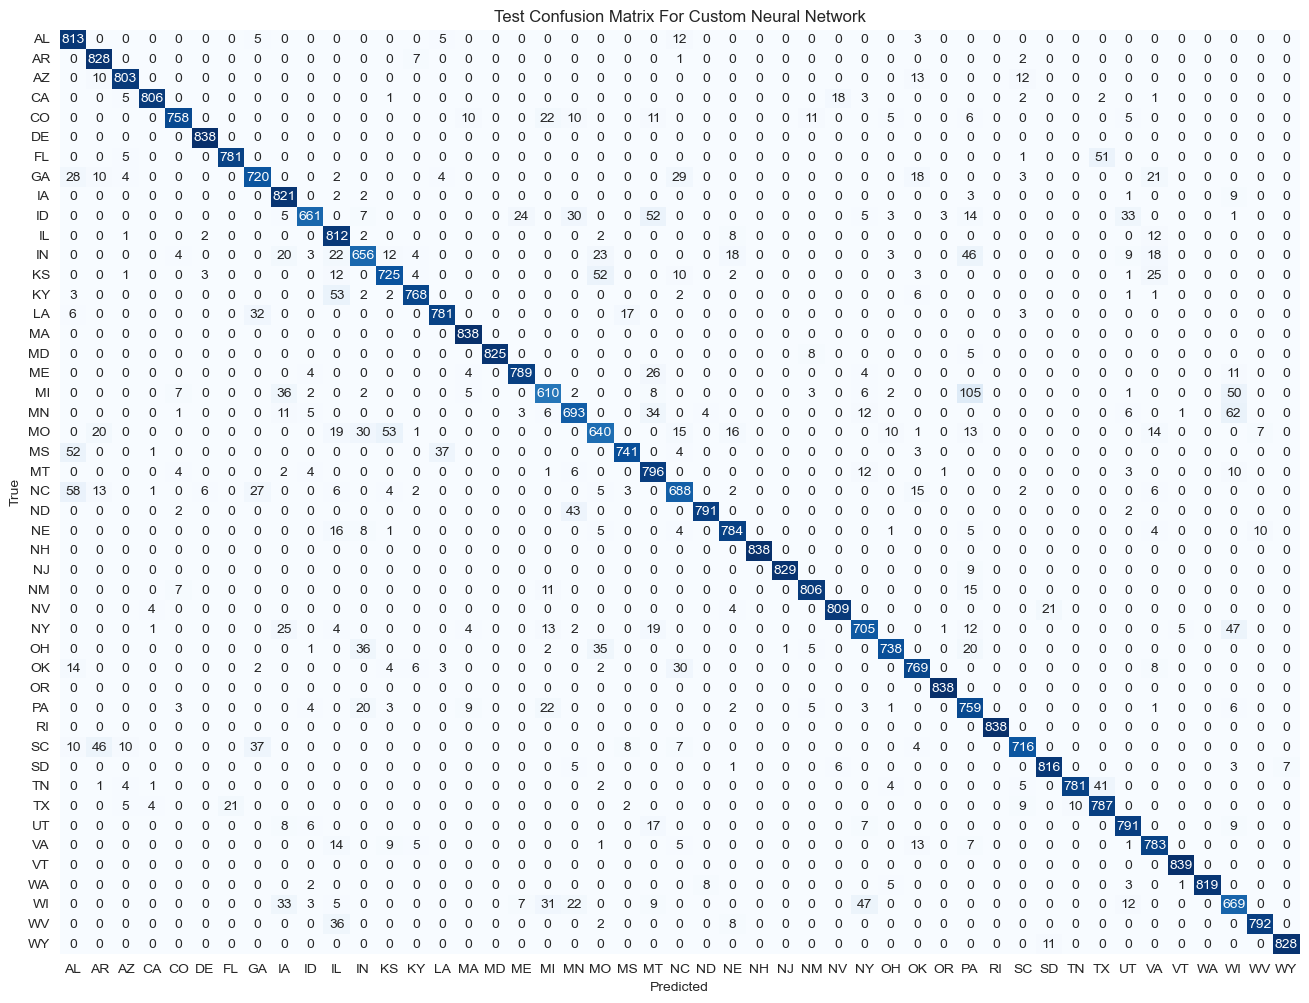

In [71]:
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix(nn_true, nn_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix For Custom Neural Network')
plt.savefig('graph/cm_test_nn.png')
plt.show()

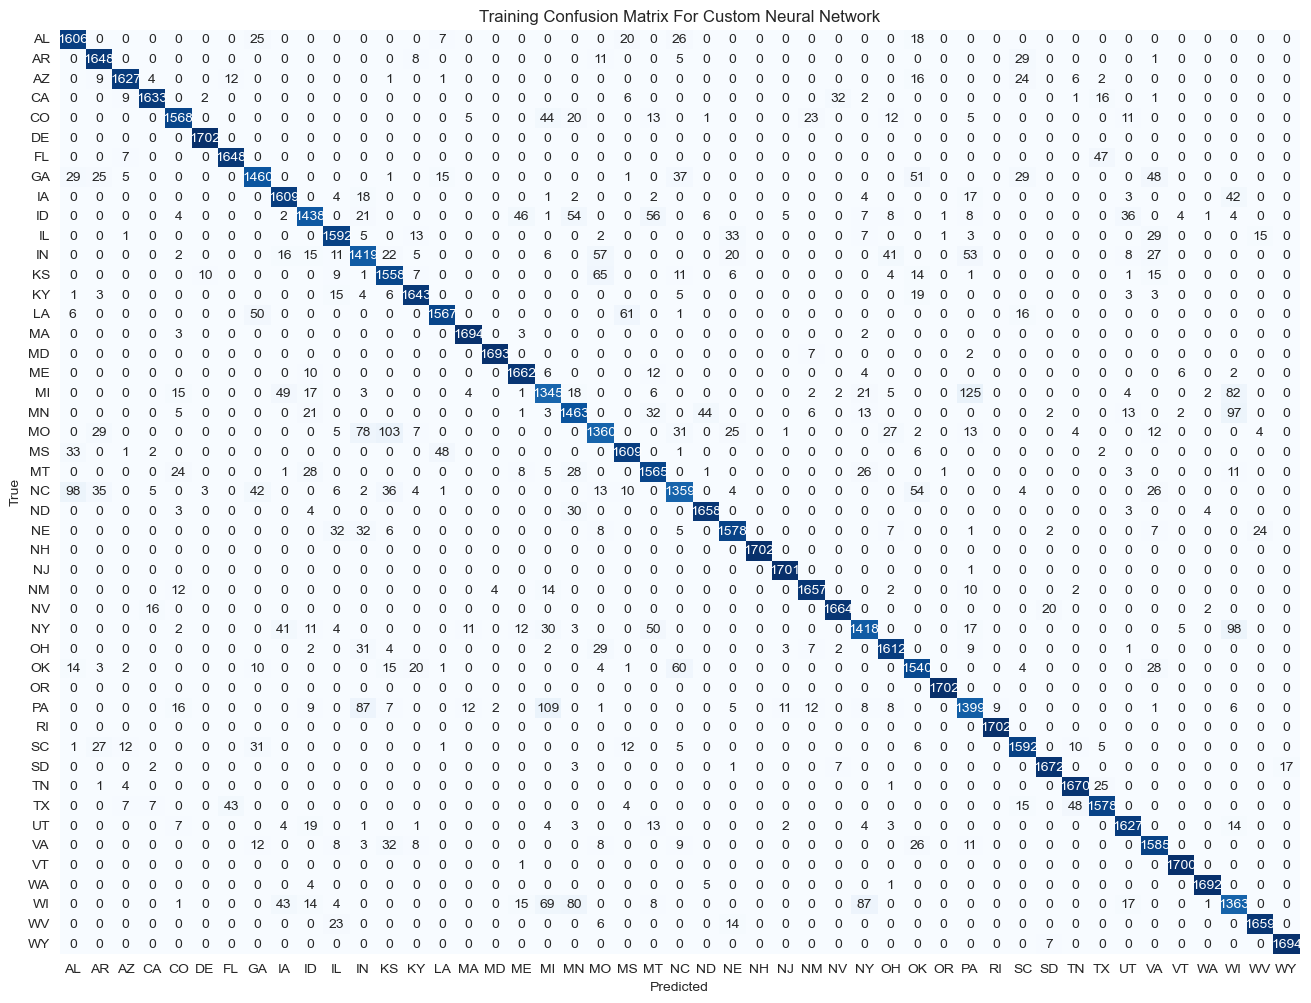

In [72]:
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix(all_labels, all_preds), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Training Confusion Matrix For Custom Neural Network')
plt.savefig('graph/cm_train_nn.png')
plt.show()

KeyboardInterrupt: 

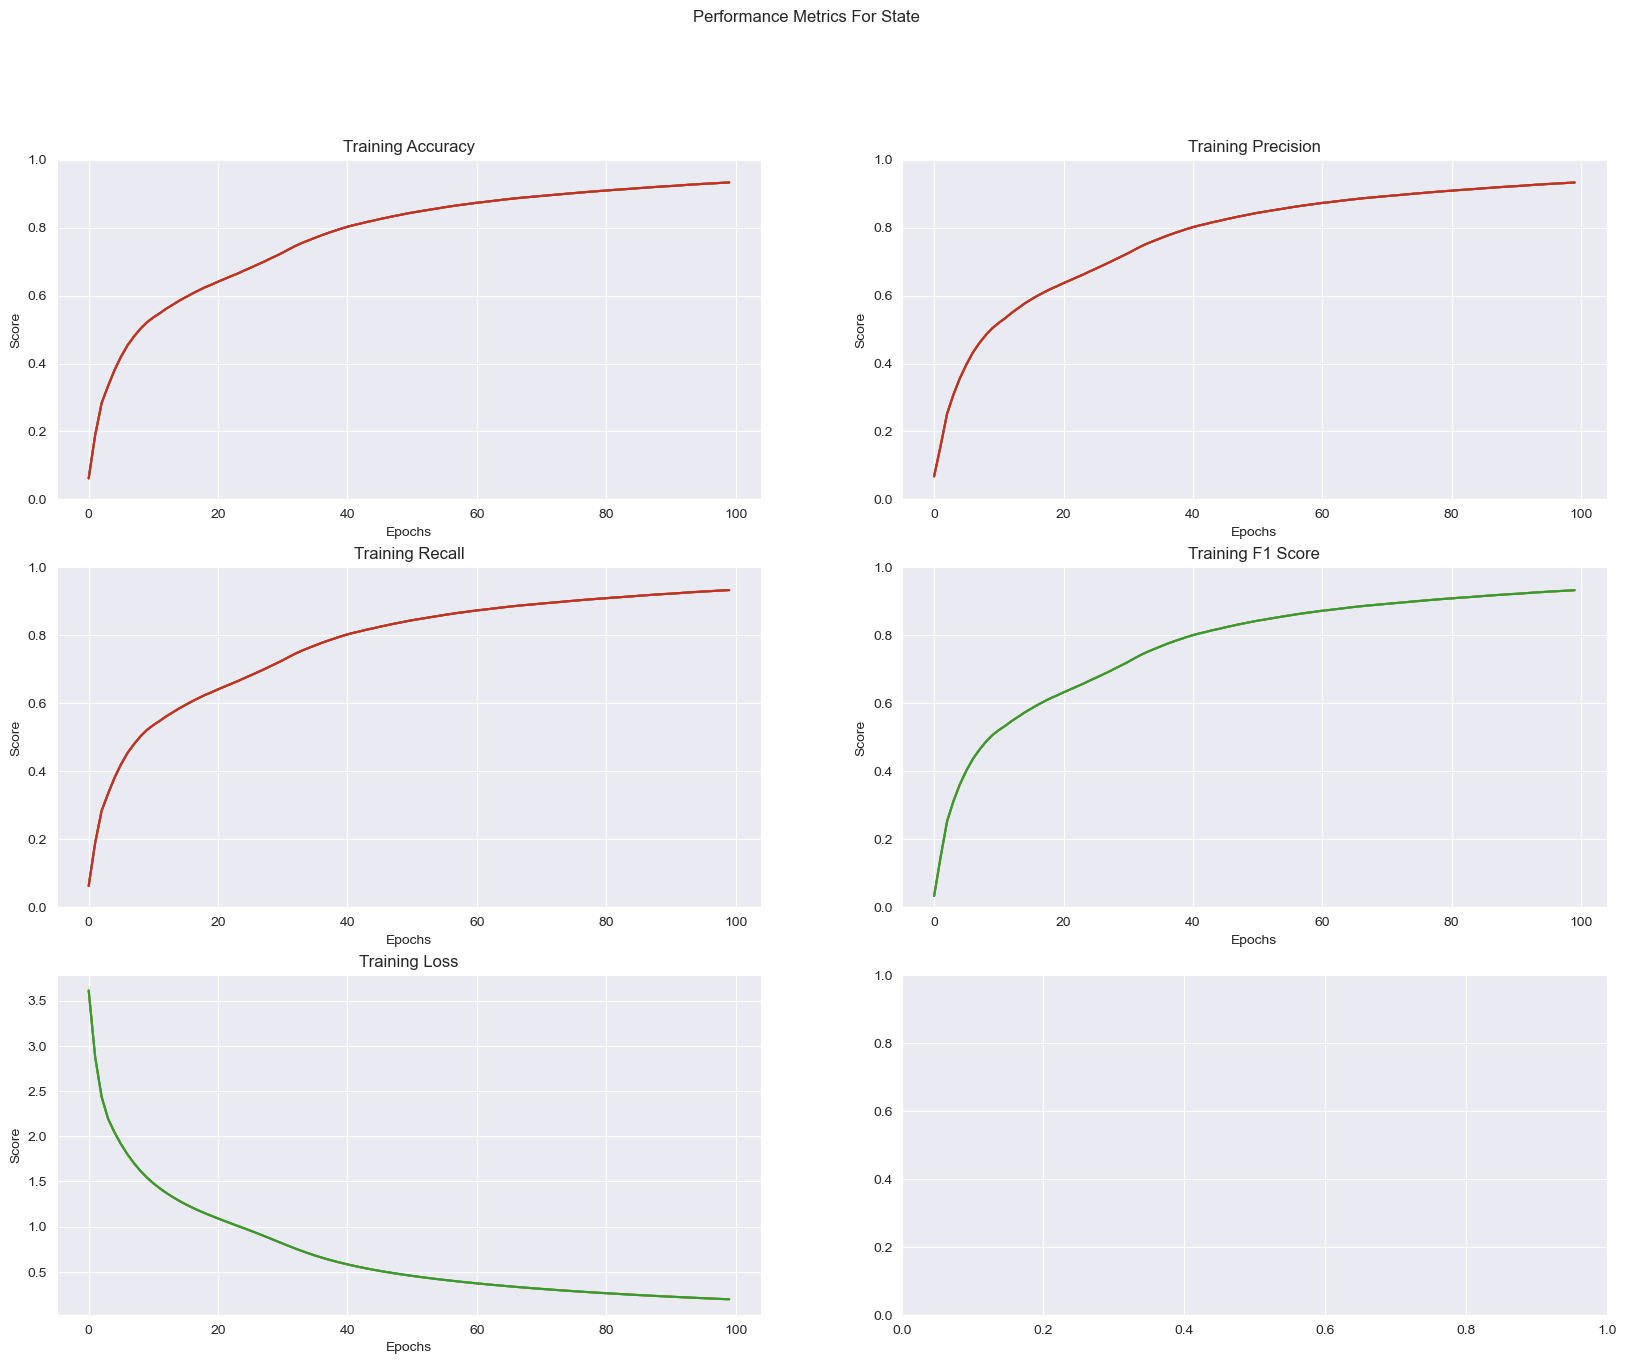

In [78]:
fig, axs = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('Performance Metrics For State')

ep = range(epochs)

for e in ep:

    axs[0, 0].plot(ep, train_acc)
    axs[0, 0].set_title('Training Accuracy')
    axs[0, 0].set_xlabel('Epochs')
    axs[0, 0].set_ylabel('Score')
    axs[0, 0].set_ylim(0, 1)

    axs[0, 1].plot(ep, train_pre, label='Train')
    axs[0, 1].set_title('Training Precision')
    axs[0, 1].set_xlabel('Epochs')
    axs[0, 1].set_ylabel('Score')
    axs[0, 1].set_ylim(0, 1)


    axs[1, 0].plot(ep, train_rec, label='Train')
    axs[1, 0].set_title('Training Recall')
    axs[1, 0].set_xlabel('Epochs')
    axs[1, 0].set_ylabel('Score')
    axs[1, 0].set_ylim(0, 1)


    axs[1, 1].plot(ep, train_f1, label='Train')
    axs[1, 1].set_title('Training F1 Score')
    axs[1, 1].set_xlabel('Epochs')
    axs[1, 1].set_ylabel('Score')
    axs[1, 1].set_ylim(0, 1)


    axs[2, 0].plot(ep, train_loss, label='Train')
    axs[2, 0].set_title('Training Loss')
    axs[2, 0].set_xlabel('Epochs')
    axs[2, 0].set_ylabel('Score')


plt.show()

Finally, for our custom neural network, we can see the cleanest confusion matrices so far out of all the models. Both the training and testing confusion matrices show similar clear diagonal lines through the confusion matrix.This pattern is shown for both the training and testing set, showing us that the model is not overfitted on the training data.  

Although the model makes some mistakes, as evidenced by the incorrect predictions outside the diagonal line, the mistakes are lower than other models. And unlike models like SVM, its mistakes are not spread out over several closely related classes. And while it can still mistake similar classes for one another, its mistakes are mostly for very similar classes, as shown by very few back to back false negatives for similar classes.  

We can also get a better feel for the neural networks training performance by the graphs of its  various scores and losses.

The Accuracy, Precision, Recall and F1 Scores all show similar graphs all thoughout the training process. And while they all start out show, see see significant jumps in performance in around five epochs, after which it slows down to a steady increase. This continues up until the end of 100 epochs, where its able to achieve a respectable score of around 90%. This slow increase shows that the model learns slowly but surely. This is further evidenced by the small differences in the training and testing scores, which disproves any notion of the model overfitting.

The depicted loss graph shows a discernible pattern: a rapid decline in loss scores within the initial five epochs, followed by a gradual reduction until the model's training concludes. Particularly, the loss graph exhibits a symmetrical correspondence with other metric graphs, showing a linear correlation among accuracy, precision, recall, F1 score, and the loss function throughout the training phase.